# Plot persistence times vs. clade 

This reads in the output of `human-tips-vs-persistence-times` and looks at the inferred clusters and groups by clade and region. The analysis in `human-tips-vs-persistence-times` runs Gytis's subtree function to infer every introduction from wild to domestic birds, calculates the total persistence time of that introduction, and also counts the number of human tips in that introduction. This is done across the entire posterior, but is the equivalent of looking at every introduction as plotted in an exploded tree, with a small exception: in the standard exploded trees, I plot the amount of time circulation proceeds within domestic, and I do NOT plot transitions into human. In this analysis, I only stop the traversal if we transition back into the wild deme. So I allow the traversal to continue through human and domestic branches and tips. 

In this notebook, I am just doing a very simple mapping of each cluster. For each cluster, pull out the clades of each tip in it. Then group them into some higher order groupings and see whether it correlates with persistence times at all. I also want to mmake sure that this is somewhat reasonable based on the geographic distribution of the clades. Here is a scatter plot from Nextstrain showing clade by geography 

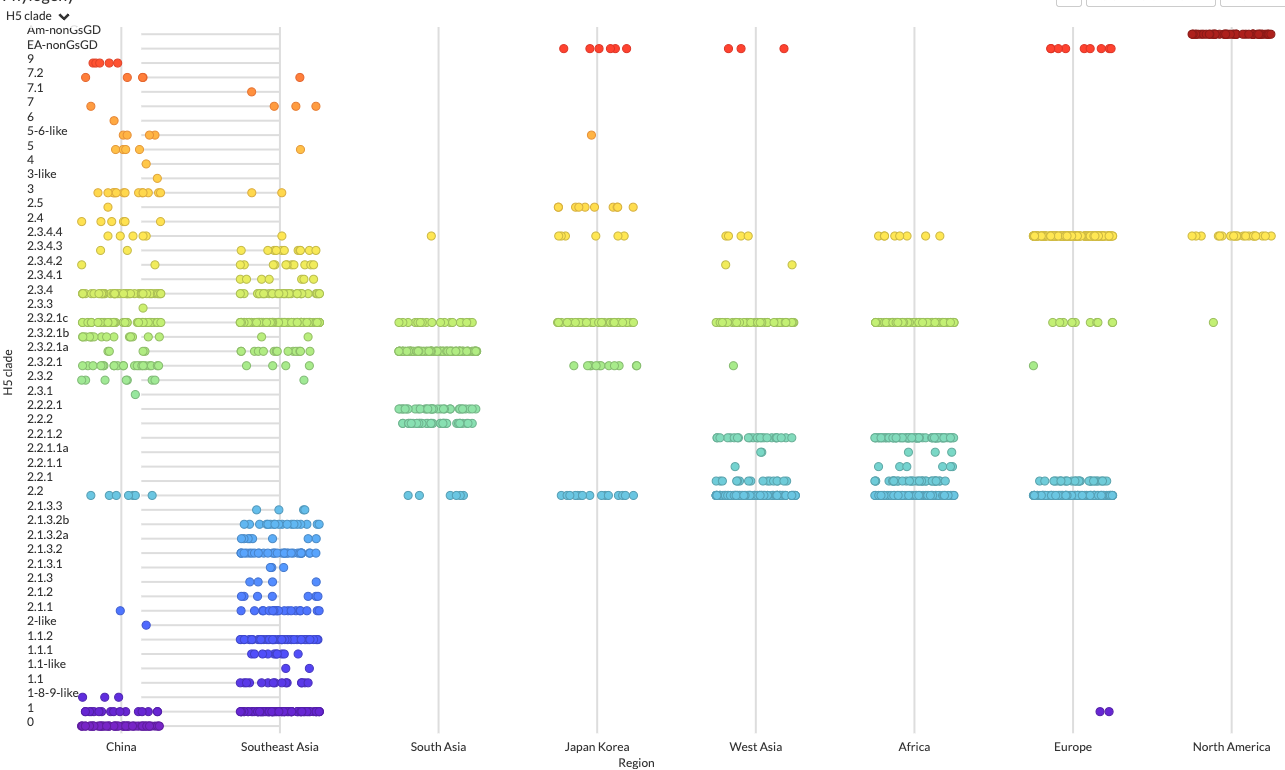

Basically, clades 1 and 2.1 are only really present in China and Southeast Asia. Everything else is found all over the world. How do we properly account for this? 

1. For the question "Is clade a predictor of human tips while controlling for circulation time and region?", I think that maybe this still works. What the regression is doing is asking: 

In [124]:
import glob
import re,copy, imp
import pandas as pd 
import numpy as np

# for this to work, you will need to download the most recent version of baltic, available here 
bt = imp.load_source('baltic', '/Users/lhmoncla/src/baltic/baltic/baltic.py')

%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.patheffects as path_effects
import matplotlib.lines as mlines
from matplotlib.font_manager import FontProperties
import matplotlib.colors as clr
import textwrap as textwrap
from textwrap import wrap

import time
from io import StringIO

import rpy2
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [125]:
from datetime import date
current_date = str(date.today())

# define colors 
domestic_color="#4E83AE"
wild_color="#CEB540"
human_color="#DE4428"

In [126]:
h5nx_clades_file = "/Users/lhmoncla/src/avian-flu/clade-labeling/h5nx-clades.tsv"

In [127]:
h5nx_clades_dict = {}

with open(h5nx_clades_file, "r") as infile: 
    for line in infile: 
        strain = line.split("\t")[0]
        clade = line.split("\t")[1].strip()
        h5nx_clades_dict[strain] = clade
        
#print(h5n1_clades_dict)

In [128]:
# read in persistence times tsv output 
persistence_times = "beast-runs/2023-03-08-mascot-skyline-3deme/5-year-region-host-GsGd-only-h5nx-1996-Neprior/combined-it1-it3-circulation-time-vs-human-tips-2023-03-29.tsv"

persistence_times_dict = {}

with open(persistence_times, "r") as infile:
    for line in infile:
        
        if "subtree_number" not in line:
            tree_number = line.split("\t")[1]
            tips_list = line.split("\t")[5].replace("[","").replace("]","").replace("\'","").strip().split(", ")
            persistence_times_dict[str(tips_list)] = {"clades":[],"regions":[]}
        
            for t in tips_list:
                strain_name = t.split("|")[0]
                region = t.split("|")[4]
                
                if strain_name in h5nx_clades_dict:
                    persistence_times_dict[str(tips_list)]['clades'].append(h5nx_clades_dict[strain_name])
                    persistence_times_dict[str(tips_list)]['regions'].append(region)
                
                else:
                    print("no clade for", strain_name)

no clade for A/Hubei/29578/2016xPR8_CNICHB29578
no clade for A/turkey/Poland/464/2020_H5N8
no clade for A/Hubei/29578/2016xPR8_CNICHB29578
no clade for A/turkey/Poland/464/2020_H5N8
no clade for A/Hubei/29578/2016xPR8_CNICHB29578
no clade for A/turkey/Poland/464/2020_H5N8
no clade for A/Hubei/29578/2016xPR8_CNICHB29578
no clade for A/turkey/Poland/464/2020_H5N8
no clade for A/Hubei/29578/2016xPR8_CNICHB29578
no clade for A/turkey/Poland/464/2020_H5N8
no clade for A/Hubei/29578/2016xPR8_CNICHB29578
no clade for A/turkey/Poland/464/2020_H5N8
no clade for A/Hubei/29578/2016xPR8_CNICHB29578
no clade for A/turkey/Poland/464/2020_H5N8
no clade for A/Hubei/29578/2016xPR8_CNICHB29578
no clade for A/turkey/Poland/464/2020_H5N8
no clade for A/Hubei/29578/2016xPR8_CNICHB29578
no clade for A/turkey/Poland/464/2020_H5N8
no clade for A/Hubei/29578/2016xPR8_CNICHB29578
no clade for A/turkey/Poland/464/2020_H5N8
no clade for A/Hubei/29578/2016xPR8_CNICHB29578
no clade for A/turkey/Poland/464/2020_H5N8

no clade for A/Hubei/29578/2016xPR8_CNICHB29578
no clade for A/turkey/Poland/464/2020_H5N8
no clade for A/Hubei/29578/2016xPR8_CNICHB29578
no clade for A/turkey/Poland/464/2020_H5N8
no clade for A/Hubei/29578/2016xPR8_CNICHB29578
no clade for A/turkey/Poland/464/2020_H5N8
no clade for A/Hubei/29578/2016xPR8_CNICHB29578
no clade for A/turkey/Poland/464/2020_H5N8
no clade for A/Hubei/29578/2016xPR8_CNICHB29578
no clade for A/turkey/Poland/464/2020_H5N8
no clade for A/Hubei/29578/2016xPR8_CNICHB29578
no clade for A/turkey/Poland/464/2020_H5N8
no clade for A/Hubei/29578/2016xPR8_CNICHB29578
no clade for A/turkey/Poland/464/2020_H5N8
no clade for A/Hubei/29578/2016xPR8_CNICHB29578
no clade for A/turkey/Poland/464/2020_H5N8
no clade for A/Hubei/29578/2016xPR8_CNICHB29578
no clade for A/turkey/Poland/464/2020_H5N8
no clade for A/Hubei/29578/2016xPR8_CNICHB29578
no clade for A/turkey/Poland/464/2020_H5N8
no clade for A/Hubei/29578/2016xPR8_CNICHB29578
no clade for A/turkey/Poland/464/2020_H5N8

no clade for A/Hubei/29578/2016xPR8_CNICHB29578
no clade for A/turkey/Poland/464/2020_H5N8
no clade for A/Hubei/29578/2016xPR8_CNICHB29578
no clade for A/turkey/Poland/464/2020_H5N8
no clade for A/Hubei/29578/2016xPR8_CNICHB29578
no clade for A/turkey/Poland/464/2020_H5N8
no clade for A/Hubei/29578/2016xPR8_CNICHB29578
no clade for A/turkey/Poland/464/2020_H5N8
no clade for A/Hubei/29578/2016xPR8_CNICHB29578
no clade for A/turkey/Poland/464/2020_H5N8
no clade for A/Hubei/29578/2016xPR8_CNICHB29578
no clade for A/turkey/Poland/464/2020_H5N8
no clade for A/Hubei/29578/2016xPR8_CNICHB29578
no clade for A/turkey/Poland/464/2020_H5N8
no clade for A/Hubei/29578/2016xPR8_CNICHB29578
no clade for A/turkey/Poland/464/2020_H5N8
no clade for A/Hubei/29578/2016xPR8_CNICHB29578
no clade for A/turkey/Poland/464/2020_H5N8
no clade for A/Hubei/29578/2016xPR8_CNICHB29578
no clade for A/turkey/Poland/464/2020_H5N8
no clade for A/Hubei/29578/2016xPR8_CNICHB29578
no clade for A/turkey/Poland/464/2020_H5N8

no clade for A/Hubei/29578/2016xPR8_CNICHB29578
no clade for A/turkey/Poland/464/2020_H5N8
no clade for A/Hubei/29578/2016xPR8_CNICHB29578
no clade for A/turkey/Poland/464/2020_H5N8
no clade for A/Hubei/29578/2016xPR8_CNICHB29578
no clade for A/turkey/Poland/464/2020_H5N8
no clade for A/Hubei/29578/2016xPR8_CNICHB29578
no clade for A/turkey/Poland/464/2020_H5N8
no clade for A/Hubei/29578/2016xPR8_CNICHB29578
no clade for A/turkey/Poland/464/2020_H5N8
no clade for A/Hubei/29578/2016xPR8_CNICHB29578
no clade for A/turkey/Poland/464/2020_H5N8
no clade for A/Hubei/29578/2016xPR8_CNICHB29578
no clade for A/turkey/Poland/464/2020_H5N8
no clade for A/Hubei/29578/2016xPR8_CNICHB29578
no clade for A/turkey/Poland/464/2020_H5N8
no clade for A/Hubei/29578/2016xPR8_CNICHB29578
no clade for A/turkey/Poland/464/2020_H5N8
no clade for A/Hubei/29578/2016xPR8_CNICHB29578
no clade for A/turkey/Poland/464/2020_H5N8
no clade for A/Hubei/29578/2016xPR8_CNICHB29578
no clade for A/turkey/Poland/464/2020_H5N8

no clade for A/Hubei/29578/2016xPR8_CNICHB29578
no clade for A/turkey/Poland/464/2020_H5N8
no clade for A/Hubei/29578/2016xPR8_CNICHB29578
no clade for A/turkey/Poland/464/2020_H5N8
no clade for A/Hubei/29578/2016xPR8_CNICHB29578
no clade for A/turkey/Poland/464/2020_H5N8
no clade for A/Hubei/29578/2016xPR8_CNICHB29578
no clade for A/turkey/Poland/464/2020_H5N8
no clade for A/Hubei/29578/2016xPR8_CNICHB29578
no clade for A/turkey/Poland/464/2020_H5N8
no clade for A/Hubei/29578/2016xPR8_CNICHB29578
no clade for A/turkey/Poland/464/2020_H5N8
no clade for A/Hubei/29578/2016xPR8_CNICHB29578
no clade for A/turkey/Poland/464/2020_H5N8
no clade for A/Hubei/29578/2016xPR8_CNICHB29578
no clade for A/turkey/Poland/464/2020_H5N8
no clade for A/Hubei/29578/2016xPR8_CNICHB29578
no clade for A/turkey/Poland/464/2020_H5N8
no clade for A/Hubei/29578/2016xPR8_CNICHB29578
no clade for A/turkey/Poland/464/2020_H5N8
no clade for A/Hubei/29578/2016xPR8_CNICHB29578
no clade for A/turkey/Poland/464/2020_H5N8

no clade for A/Hubei/29578/2016xPR8_CNICHB29578
no clade for A/turkey/Poland/464/2020_H5N8
no clade for A/Hubei/29578/2016xPR8_CNICHB29578
no clade for A/turkey/Poland/464/2020_H5N8
no clade for A/Hubei/29578/2016xPR8_CNICHB29578
no clade for A/turkey/Poland/464/2020_H5N8
no clade for A/Hubei/29578/2016xPR8_CNICHB29578
no clade for A/turkey/Poland/464/2020_H5N8
no clade for A/Hubei/29578/2016xPR8_CNICHB29578
no clade for A/turkey/Poland/464/2020_H5N8
no clade for A/Hubei/29578/2016xPR8_CNICHB29578
no clade for A/turkey/Poland/464/2020_H5N8
no clade for A/Hubei/29578/2016xPR8_CNICHB29578
no clade for A/turkey/Poland/464/2020_H5N8
no clade for A/Hubei/29578/2016xPR8_CNICHB29578
no clade for A/turkey/Poland/464/2020_H5N8
no clade for A/Hubei/29578/2016xPR8_CNICHB29578
no clade for A/turkey/Poland/464/2020_H5N8
no clade for A/Hubei/29578/2016xPR8_CNICHB29578
no clade for A/turkey/Poland/464/2020_H5N8
no clade for A/Hubei/29578/2016xPR8_CNICHB29578
no clade for A/turkey/Poland/464/2020_H5N8

no clade for A/Hubei/29578/2016xPR8_CNICHB29578
no clade for A/turkey/Poland/464/2020_H5N8
no clade for A/Hubei/29578/2016xPR8_CNICHB29578
no clade for A/turkey/Poland/464/2020_H5N8
no clade for A/Hubei/29578/2016xPR8_CNICHB29578
no clade for A/turkey/Poland/464/2020_H5N8
no clade for A/Hubei/29578/2016xPR8_CNICHB29578
no clade for A/turkey/Poland/464/2020_H5N8
no clade for A/Hubei/29578/2016xPR8_CNICHB29578
no clade for A/turkey/Poland/464/2020_H5N8
no clade for A/Hubei/29578/2016xPR8_CNICHB29578
no clade for A/turkey/Poland/464/2020_H5N8
no clade for A/Hubei/29578/2016xPR8_CNICHB29578
no clade for A/turkey/Poland/464/2020_H5N8
no clade for A/Hubei/29578/2016xPR8_CNICHB29578
no clade for A/turkey/Poland/464/2020_H5N8
no clade for A/Hubei/29578/2016xPR8_CNICHB29578
no clade for A/turkey/Poland/464/2020_H5N8
no clade for A/Hubei/29578/2016xPR8_CNICHB29578
no clade for A/turkey/Poland/464/2020_H5N8
no clade for A/Hubei/29578/2016xPR8_CNICHB29578
no clade for A/turkey/Poland/464/2020_H5N8

no clade for A/Hubei/29578/2016xPR8_CNICHB29578
no clade for A/turkey/Poland/464/2020_H5N8
no clade for A/Hubei/29578/2016xPR8_CNICHB29578
no clade for A/turkey/Poland/464/2020_H5N8
no clade for A/Hubei/29578/2016xPR8_CNICHB29578
no clade for A/turkey/Poland/464/2020_H5N8
no clade for A/Hubei/29578/2016xPR8_CNICHB29578
no clade for A/turkey/Poland/464/2020_H5N8
no clade for A/Hubei/29578/2016xPR8_CNICHB29578
no clade for A/turkey/Poland/464/2020_H5N8
no clade for A/Hubei/29578/2016xPR8_CNICHB29578
no clade for A/turkey/Poland/464/2020_H5N8
no clade for A/Hubei/29578/2016xPR8_CNICHB29578
no clade for A/turkey/Poland/464/2020_H5N8
no clade for A/Hubei/29578/2016xPR8_CNICHB29578
no clade for A/turkey/Poland/464/2020_H5N8
no clade for A/Hubei/29578/2016xPR8_CNICHB29578
no clade for A/turkey/Poland/464/2020_H5N8
no clade for A/Hubei/29578/2016xPR8_CNICHB29578
no clade for A/turkey/Poland/464/2020_H5N8
no clade for A/Hubei/29578/2016xPR8_CNICHB29578
no clade for A/turkey/Poland/464/2020_H5N8

no clade for A/Hubei/29578/2016xPR8_CNICHB29578
no clade for A/turkey/Poland/464/2020_H5N8
no clade for A/Hubei/29578/2016xPR8_CNICHB29578
no clade for A/turkey/Poland/464/2020_H5N8
no clade for A/Hubei/29578/2016xPR8_CNICHB29578
no clade for A/turkey/Poland/464/2020_H5N8
no clade for A/Hubei/29578/2016xPR8_CNICHB29578
no clade for A/turkey/Poland/464/2020_H5N8
no clade for A/Hubei/29578/2016xPR8_CNICHB29578
no clade for A/turkey/Poland/464/2020_H5N8
no clade for A/Hubei/29578/2016xPR8_CNICHB29578
no clade for A/turkey/Poland/464/2020_H5N8
no clade for A/Hubei/29578/2016xPR8_CNICHB29578
no clade for A/turkey/Poland/464/2020_H5N8
no clade for A/Hubei/29578/2016xPR8_CNICHB29578
no clade for A/turkey/Poland/464/2020_H5N8
no clade for A/Hubei/29578/2016xPR8_CNICHB29578
no clade for A/turkey/Poland/464/2020_H5N8
no clade for A/Hubei/29578/2016xPR8_CNICHB29578
no clade for A/turkey/Poland/464/2020_H5N8
no clade for A/Hubei/29578/2016xPR8_CNICHB29578
no clade for A/turkey/Poland/464/2020_H5N8

no clade for A/Hubei/29578/2016xPR8_CNICHB29578
no clade for A/turkey/Poland/464/2020_H5N8
no clade for A/Hubei/29578/2016xPR8_CNICHB29578
no clade for A/turkey/Poland/464/2020_H5N8
no clade for A/Hubei/29578/2016xPR8_CNICHB29578
no clade for A/turkey/Poland/464/2020_H5N8
no clade for A/Hubei/29578/2016xPR8_CNICHB29578
no clade for A/turkey/Poland/464/2020_H5N8
no clade for A/Hubei/29578/2016xPR8_CNICHB29578
no clade for A/turkey/Poland/464/2020_H5N8
no clade for A/Hubei/29578/2016xPR8_CNICHB29578
no clade for A/turkey/Poland/464/2020_H5N8
no clade for A/Hubei/29578/2016xPR8_CNICHB29578
no clade for A/turkey/Poland/464/2020_H5N8
no clade for A/Hubei/29578/2016xPR8_CNICHB29578
no clade for A/turkey/Poland/464/2020_H5N8
no clade for A/Hubei/29578/2016xPR8_CNICHB29578
no clade for A/turkey/Poland/464/2020_H5N8
no clade for A/Hubei/29578/2016xPR8_CNICHB29578
no clade for A/turkey/Poland/464/2020_H5N8
no clade for A/Hubei/29578/2016xPR8_CNICHB29578
no clade for A/turkey/Poland/464/2020_H5N8

In [129]:
print(len(persistence_times_dict))

10302


In [130]:
# clade_mapping = {"0":["0"],
#                  "1":["1","1.1","1.1-like","1.1.1","1.1.2"],
#                  "2.1":["2-like","2.1.1","2.1.2","2.1.3","2.1.3.1","2.1.3.2","2.1.3.2a","2.1.3.2b","2.1.3.3"], 
#                  "2.2":["2.2","2.2.1","2.2.1.1","2.2.1.1a","2.2.1.2","2.2.2","2.2.2.1"], 
#                  "2.3":["2.3.1","2.3.2","2.3.2.1","2.3.2.1a","2.3.2.1b","2.3.2.1c","2.3.3","2.3.4","2.3.4-like","2.3.4.1","2.3.4.2","2.3.4.3","2.3.4.4"],
#                  "other":["2.4","2.5","3","3-like","4","5","5-6-like","6","7","7.1","7.2","8","8-9-like","9","EA-nonGsGD","Am-nonGsGD","1-8-9-like"]}

In [131]:
# condense clades into groups
clade_mapping = {
"0":"0",
 
"1":"1",
"1.1":"1",
"1.1-like":"1",
"1.1.1":"1",
"1.1.2":"1",
 
"2.1":"2.1",
"2-like":"2.1",
"2.1.1":"2.1",
"2.1.2":"2.1",
"2.1.3":"2.1",
"2.1.3.1":"2.1",
"2.1.3.2":"2.1",
"2.1.3.2a":"2.1",
"2.1.3.2b":"2.1",
"2.1.3.3":"2.1",
 
"2.2":"2.2",
"2.2.1":"2.2",
"2.2.1.1":"2.2",
"2.2.1.1a":"2.2",
"2.2.1.2":"2.2",
"2.2.2":"2.2",
"2.2.2.1":"2.2",
 
"2.3":"2.3",
"2.3.2":"2.3",
"2.3.2.1":"2.3",
"2.3.2.1a":"2.3",
"2.3.2.1b":"2.3",
"2.3.2.1c":"2.3",
                 
"2.3.4":"2.3.4",
"2.3.4-like":"2.3.4",
"2.3.4.1":"2.3.4.4",
"2.3.4.2":"2.3.4.4",
"2.3.4.3":"2.3.4.4",
"2.3.4.4":"2.3.4.4",
 
"2.4":"other",
"2.5":"other",
"3":"other",
"3-like":"other",
"4":"other",
"5":"other",
"5-6-like":"other",
"6":"other",
"7":"other",
"7.1":"other",
"7.2":"other",
"8":"other",
"8-9-like":"other",
"9":"other",
"EA-nonGsGD":"non-GsGd",
"Am-nonGsGD":"non-GsGd",
"1-8-9-like":"other"}

In [132]:
# condense clades into groups
clade_mapping = {
"0":"0",
"1":"1",
"1.1":"1",
"1.1-like":"1",
"1.1.1":"1",
"1.1.2":"1",
 
"2.1":"2.1",
"2-like":"2.1",
"2.1.1":"2.1",
"2.1.2":"2.1",
"2.1.3":"2.1",
"2.1.3.1":"2.1",
"2.1.3.2":"2.1",
"2.1.3.2a":"2.1",
"2.1.3.2b":"2.1",
"2.1.3.3":"2.1",
 
"2.2":"2.2",
"2.2.1":"2.2",
"2.2.1.1":"2.2",
"2.2.1.1a":"2.2",
"2.2.1.2":"2.2",
"2.2.2":"2.2",
"2.2.2.1":"2.2",
 
"2.3":"2.3",
"2.3.1":"2.3",
"2.3.2":"2.3",
"2.3.2.1":"2.3",
"2.3.2.1a":"2.3",
"2.3.2.1b":"2.3",
"2.3.2.1c":"2.3",
"2.3.2.1d":"2.3",
"2.3.2.1e":"2.3",
"2.3.2.1f":"2.3",
"2.3.2.1g":"2.3",
    
"2.3.3":"2.3.4x",           
"2.3.4":"2.3.4x",
"2.3.4-like":"2.3.4x",
"2.3.4.1":"2.3.4x",
"2.3.4.2":"2.3.4x",
"2.3.4.3":"2.3.4x",
"2.3.4.4":"2.3.4.4",
"2.3.4.4a":"2.3.4.4",
"2.3.4.4b":"2.3.4.4",
"2.3.4.4c":"2.3.4.4",
"2.3.4.4d":"2.3.4.4",
"2.3.4.4e":"2.3.4.4",
"2.3.4.4f":"2.3.4.4",
"2.3.4.4g":"2.3.4.4",
"2.3.4.4h":"2.3.4.4",
"2.3.4.4-like":"2.3.4.4",
 
"2.4":"other",
"2.5":"other",
"3":"other",
"3-like":"other",
"4":"other",
"5":"other",
"5-6-like":"other",
"6":"other",
"7":"other",
"7.1":"other",
"7.2":"other",
"8":"other",
"8-9-like":"other",
"9":"other",
"EA-nonGsGD":"non-GsGd",
"Am-nonGsGD":"non-GsGd",
"1-8-9-like":"other", 
"?":"unknown"}

In [133]:
# let's see if we can condense these into a few categories: 0, 1, 2.1, 2.2, 2.3, and other 

persistence_times_dict2 = {}
mixed = 0
single = 0
mixed_regions = 0
single_regions = 0

# for each cluster
for p in persistence_times_dict: 
    clade_groups = []
    region_groups = []
    
    persistence_times_dict2[p] = {"clades":"", "regions":""}
    
    if p != "['tips_in_subtree']":
        # for each clade in the cluster, assign it a clade group 
        for clade in persistence_times_dict[p]['clades']:
            clade_group = clade_mapping[clade]
            clade_groups.append(clade_group)

        if len(set(clade_groups)) > 1:
            mixed += 1
            persistence_times_dict2[p]['clades'] = "mixed"
        else: 
            single += 1
            persistence_times_dict2[p]['clades'] = str(set(clade_groups)).replace("{","").replace("}","").replace("\'","")

        for region in persistence_times_dict[p]['regions']:
            region_groups.append(region)

        if len(set(region_groups)) > 1:
            mixed_regions += 1
            persistence_times_dict2[p]['regions'] = "mixed"
        else: 
            single_regions += 1
            persistence_times_dict2[p]['regions'] = str(set(region_groups)).replace("{","").replace("}","").replace("\'","")

            
print(mixed, single)
print(mixed_regions, single_regions)

497 9805
5609 4693


In [134]:
#persistence_times_dict2

In [135]:
clades_df = pd.DataFrame.from_dict(persistence_times_dict2, orient="index")
clades_df.reset_index(inplace=True)
clades_df.columns = ["tips_in_subtree","clade_group", "region_group"]
clades_df.head()

,tips_in_subtree,clade_group,region_group
0,['A/HongKong/514/1997|1997.0|1997-XX-XX|human|...,0,China
1,['A/duck/Guangxi/07/1999|1999.0|1999-XX-XX|avi...,0,China
2,['A/duck/Guangdong/40/2000|2000.0|2000-XX-XX|a...,0,China
3,['A/duck/Zhejiang/52/2000|2000.0|2000-XX-XX|av...,other,China
4,['A/goose/Shantou/5456/2001|2001.0|2001-XX-XX|...,0,China


In [136]:
len(clades_df[clades_df['region_group'] == 'mixed'])

5609

In [137]:
# merge with other dataframee 
# read dataframe back in 
df = pd.read_csv(persistence_times, sep="\t")
print(len(df))
df.head()

183187


,Unnamed: 0,tree_number,subtree_number,circulation_time,n_human_tips,tips_in_subtree
0,0,1,1,2.805751,6,['A/HongKong/514/1997|1997.0|1997-XX-XX|human|...
1,0,1,2,4.805751,0,['A/duck/Guangxi/07/1999|1999.0|1999-XX-XX|avi...
2,0,1,3,0.011421,0,['A/duck/Guangdong/40/2000|2000.0|2000-XX-XX|a...
3,0,1,4,0.608013,0,['A/duck/Zhejiang/52/2000|2000.0|2000-XX-XX|av...
4,0,1,5,1.570267,0,['A/goose/Shantou/5456/2001|2001.0|2001-XX-XX|...


In [138]:
df_with_clade = df.merge(clades_df, on="tips_in_subtree")
print(len(df_with_clade))
df_with_clade.head()

183187


,Unnamed: 0,tree_number,subtree_number,circulation_time,n_human_tips,tips_in_subtree,clade_group,region_group
0,0,1,1,2.805751,6,['A/HongKong/514/1997|1997.0|1997-XX-XX|human|...,0,China
1,0,2,1,3.001728,6,['A/HongKong/514/1997|1997.0|1997-XX-XX|human|...,0,China
2,0,25,1,2.745409,6,['A/HongKong/514/1997|1997.0|1997-XX-XX|human|...,0,China
3,0,31,1,2.870245,6,['A/HongKong/514/1997|1997.0|1997-XX-XX|human|...,0,China
4,0,43,1,2.981645,6,['A/HongKong/514/1997|1997.0|1997-XX-XX|human|...,0,China


In [139]:
len(df_with_clade[df_with_clade['region_group'] == 'mixed'])

14185

In [140]:
def return_n_tips(tips_in_subtree_column):
    tips_list = tips_in_subtree_column.split(",")
    n_tips = len(tips_list)
    return(n_tips)

In [141]:
df_with_clade['n_tips_in_subtree'] = df['tips_in_subtree'].apply(return_n_tips)
df_with_clade.head()

,Unnamed: 0,tree_number,subtree_number,circulation_time,n_human_tips,tips_in_subtree,clade_group,region_group,n_tips_in_subtree
0,0,1,1,2.805751,6,['A/HongKong/514/1997|1997.0|1997-XX-XX|human|...,0,China,7
1,0,2,1,3.001728,6,['A/HongKong/514/1997|1997.0|1997-XX-XX|human|...,0,China,9
2,0,25,1,2.745409,6,['A/HongKong/514/1997|1997.0|1997-XX-XX|human|...,0,China,1
3,0,31,1,2.870245,6,['A/HongKong/514/1997|1997.0|1997-XX-XX|human|...,0,China,1
4,0,43,1,2.981645,6,['A/HongKong/514/1997|1997.0|1997-XX-XX|human|...,0,China,4


In [142]:
# plot together 
df_with_clade['human_tips'] = np.where(df_with_clade['n_human_tips']==0, 0, 1)
df_with_clade.head()

,Unnamed: 0,tree_number,subtree_number,circulation_time,n_human_tips,tips_in_subtree,clade_group,region_group,n_tips_in_subtree,human_tips
0,0,1,1,2.805751,6,['A/HongKong/514/1997|1997.0|1997-XX-XX|human|...,0,China,7,1
1,0,2,1,3.001728,6,['A/HongKong/514/1997|1997.0|1997-XX-XX|human|...,0,China,9,1
2,0,25,1,2.745409,6,['A/HongKong/514/1997|1997.0|1997-XX-XX|human|...,0,China,1,1
3,0,31,1,2.870245,6,['A/HongKong/514/1997|1997.0|1997-XX-XX|human|...,0,China,1,1
4,0,43,1,2.981645,6,['A/HongKong/514/1997|1997.0|1997-XX-XX|human|...,0,China,4,1


In [143]:
print(set(df_with_clade['clade_group'].tolist()))

{'2.2', '2.3', 'set()', '2.1', '2.3.4.4', '0', 'other', '2.3.4x', 'mixed', '1'}


In [144]:
print(len(df_with_clade[df_with_clade['clade_group'] == "mixed"]))
print(len(df_with_clade[df_with_clade['clade_group'] == "other"]))
print(len(df_with_clade))

print(len(df_with_clade[df_with_clade['region_group'] == "mixed"]))
print(len(df_with_clade))

521
12244
183187
14185
183187


## how many introductions feature a mixed or "other" clade? 

0.2% of introductions are mixed, and 5% are other. So 95% of introductions are of clade 0, 1, 2.1, 2.2, 2.3, or 2.3.4. 

In [48]:
# remove rows with other; these are all very small clades that are sort of odd, and I don't think we need to include them 
# print(len(df_with_clade))
# df_with_clade = df_with_clade[df_with_clade['clade_group']!='other']
# print(len(df_with_clade))

### Regression models: 1 variable at a time

In [49]:
%%R -w 800 -h 500 -u px -i df_with_clade

reg1 <- lm(n_human_tips~circulation_time,data=df_with_clade) 
print(summary(reg1))


Call:
lm(formula = n_human_tips ~ circulation_time, data = df_with_clade)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.796  -0.285   0.191   0.400 128.585 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -0.632064   0.006795  -93.02   <2e-16 ***
circulation_time  0.958616   0.002227  430.46   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.54 on 183185 degrees of freedom
Multiple R-squared:  0.5029,	Adjusted R-squared:  0.5029 
F-statistic: 1.853e+05 on 1 and 183185 DF,  p-value: < 2.2e-16



### Each clade individually: Do human tips correlate with clade after controlling for circulation time? 

I want to know: Does the number of human tips correlate with clade and if so, does that change when we account for how long that introduction has been circulating? 

Said another way: Does clade have an effect on the number of human tips after controlling for circulation time? 

Make some extra dataframe columns for whether you are in eeach clade, yes/no

In [178]:
df_with_clade['clade_0'] = np.where(df_with_clade['clade_group']=="0", 1, 0)
df_with_clade['clade_1'] = np.where(df_with_clade['clade_group']=="1", 1, 0)

df_with_clade['clade_2.1'] = np.where(df_with_clade['clade_group']=="2.1", 1, 0)
df_with_clade['clade_2.2'] = np.where(df_with_clade['clade_group']=="2.2", 1, 0)
df_with_clade['clade_2.3x'] = np.where(df_with_clade['clade_group']=="2.3", 1, 0)
df_with_clade['clade_2.3.4x'] = np.where(df_with_clade['clade_group']=="2.3.4x", 1, 0)
df_with_clade['clade_2.3.4.4'] = np.where(df_with_clade['clade_group']=="2.3.4.4", 1, 0)

df_with_clade['clade_mixed'] = np.where(df_with_clade['clade_group']=="mixed", 1, 0)

df_with_clade['region_China'] = np.where(df_with_clade['region_group']=="China", 1, 0)
df_with_clade['region_SEA'] = np.where(df_with_clade['region_group']=="Southeast_Asia", 1, 0)
df_with_clade['region_WA'] = np.where(df_with_clade['region_group']=="West_Asia", 1, 0)
df_with_clade['region_Africa'] = np.where(df_with_clade['region_group']=="Africa", 1, 0)
df_with_clade['region_SA'] = np.where(df_with_clade['region_group']=="South_Asia", 1, 0)
df_with_clade['region_Europe'] = np.where(df_with_clade['region_group']=="Europe", 1, 0)
df_with_clade['region_Japan_Korea'] = np.where(df_with_clade['region_group']=="Japan_Korea", 1, 0)

df_with_clade['region_mixed'] = np.where(df_with_clade['region_group']=="mixed", 1, 0)

df_with_clade['has_human_tips'] = np.where(df_with_clade['n_human_tips']==0, 0, 1)

df_with_clade.head()

,Unnamed: 0,tree_number,subtree_number,circulation_time,n_human_tips,tips_in_subtree,clade_group,region_group,n_tips_in_subtree,human_tips,...,clade_mixed,region_China,region_SEA,region_WA,region_Africa,region_SA,region_Europe,region_Japan_Korea,region_mixed,has_human_tips
0,0,1,1,2.805751,6,['A/HongKong/514/1997|1997.0|1997-XX-XX|human|...,0,China,7,1,...,0,1,0,0,0,0,0,0,0,1
1,0,2,1,3.001728,6,['A/HongKong/514/1997|1997.0|1997-XX-XX|human|...,0,China,9,1,...,0,1,0,0,0,0,0,0,0,1
2,0,25,1,2.745409,6,['A/HongKong/514/1997|1997.0|1997-XX-XX|human|...,0,China,1,1,...,0,1,0,0,0,0,0,0,0,1
3,0,31,1,2.870245,6,['A/HongKong/514/1997|1997.0|1997-XX-XX|human|...,0,China,1,1,...,0,1,0,0,0,0,0,0,0,1
4,0,43,1,2.981645,6,['A/HongKong/514/1997|1997.0|1997-XX-XX|human|...,0,China,4,1,...,0,1,0,0,0,0,0,0,0,1


In [53]:
%%R -w 800 -h 500 -u px -i df_with_clade

reg1 <- lm(n_human_tips~clade_0+clade_1+clade_2.1+clade_2.2+clade_2.3x+clade_2.3.4x+clade_2.3.4.4,data=df_with_clade) 
reg2 <- lm(n_human_tips~circulation_time+clade_0+clade_1+clade_2.1+clade_2.2+clade_2.3x+clade_2.3.4x+clade_2.3.4.4,data=df_with_clade) 

print(summary(reg1))
print(summary(reg2))


Call:
lm(formula = n_human_tips ~ clade_0 + clade_1 + clade_2.1 + clade_2.2 + 
    clade_2.3x + clade_2.3.4x + clade_2.3.4.4, data = df_with_clade)

Residuals:
    Min      1Q  Median      3Q     Max 
 -5.911  -0.926  -0.282  -0.282 152.271 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.72938    0.02986  24.425  < 2e-16 ***
clade_0        0.19676    0.05475   3.594 0.000326 ***
clade_1        1.35121    0.04704  28.725  < 2e-16 ***
clade_2.1      5.18192    0.09236  56.109  < 2e-16 ***
clade_2.2      0.34038    0.03491   9.750  < 2e-16 ***
clade_2.3x    -0.26394    0.03818  -6.913 4.77e-12 ***
clade_2.3.4x   2.65188    0.04942  53.662  < 2e-16 ***
clade_2.3.4.4 -0.44689    0.03216 -13.897  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.497 on 183179 degrees of freedom
Multiple R-squared:  0.05798,	Adjusted R-squared:  0.05794 
F-statistic:  1611 on 7 and 183179 DF,  p-value: < 2.2e-16


In [54]:
%%R -w 800 -h 500 -u px -i df_with_clade

reg1 <- lm(n_human_tips~clade_0+clade_1+clade_2.1+clade_2.2+clade_2.3x+clade_2.3.4x+clade_2.3.4.4+region_China+region_SEA+region_WA+region_Europe+region_Africa+region_SA,data=df_with_clade) 

print(summary(reg1))


Call:
lm(formula = n_human_tips ~ clade_0 + clade_1 + clade_2.1 + clade_2.2 + 
    clade_2.3x + clade_2.3.4x + clade_2.3.4.4 + region_China + 
    region_SEA + region_WA + region_Europe + region_Africa + 
    region_SA, data = df_with_clade)

Residuals:
    Min      1Q  Median      3Q     Max 
 -5.911  -1.112  -0.774   0.356 151.090 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    1.91005    0.03365  56.765   <2e-16 ***
clade_0        1.26918    0.05561  22.821   <2e-16 ***
clade_1        1.31652    0.04913  26.796   <2e-16 ***
clade_2.1      4.83644    0.10043  48.157   <2e-16 ***
clade_2.2      0.37305    0.04044   9.224   <2e-16 ***
clade_2.3x    -0.58279    0.04139 -14.082   <2e-16 ***
clade_2.3.4x   3.07809    0.04865  63.268   <2e-16 ***
clade_2.3.4.4 -0.79821    0.03556 -22.448   <2e-16 ***
region_China  -2.25309    0.03195 -70.515   <2e-16 ***
region_SEA    -0.83519    0.04642 -17.993   <2e-16 ***
region_WA     -1.50885    0.02709 -55.693  

In [57]:
%%R -w 800 -h 500 -u px -i df_with_clade

reg1 <- lm(n_human_tips~clade_0,data=df_with_clade) 
reg2 <- lm(n_human_tips~clade_0+circulation_time,data=df_with_clade) 

print(summary(reg1))
print(summary(reg2))


Call:
lm(formula = n_human_tips ~ clade_0, data = df_with_clade)

Residuals:
    Min      1Q  Median      3Q     Max 
 -0.926  -0.788  -0.788  -0.788 152.212 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.787669   0.008554  92.080  < 2e-16 ***
clade_0     0.138467   0.048041   2.882  0.00395 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.603 on 183185 degrees of freedom
Multiple R-squared:  4.535e-05,	Adjusted R-squared:  3.989e-05 
F-statistic: 8.307 on 1 and 183185 DF,  p-value: 0.003949


Call:
lm(formula = n_human_tips ~ clade_0 + circulation_time, data = df_with_clade)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.800  -0.284   0.190   0.399 128.580 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -0.629462   0.006871 -91.605   <2e-16 ***
clade_0          -0.086168   0.033877  -2.544    0.011 *  
circulation_time  0.958704   0.002227 430.45

In [58]:
%%R -w 800 -h 500 -u px -i df_with_clade

reg1 <- lm(n_human_tips~clade_1,data=df_with_clade) 
reg2 <- lm(n_human_tips~clade_1+circulation_time,data=df_with_clade) 

print(summary(reg1))
print(summary(reg2))


Call:
lm(formula = n_human_tips ~ clade_1, data = df_with_clade)

Residuals:
    Min      1Q  Median      3Q     Max 
 -2.081  -0.723  -0.723  -0.723 152.277 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.723481   0.008609   84.03   <2e-16 ***
clade_1     1.357107   0.038299   35.44   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.591 on 183185 degrees of freedom
Multiple R-squared:  0.006808,	Adjusted R-squared:  0.006802 
F-statistic:  1256 on 1 and 183185 DF,  p-value: < 2.2e-16


Call:
lm(formula = n_human_tips ~ clade_1 + circulation_time, data = df_with_clade)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.816  -0.288   0.192   0.400 128.560 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -0.629124   0.006864 -91.662   <2e-16 ***
clade_1          -0.082893   0.027304  -3.036   0.0024 ** 
circulation_time  0.959457   0.002244 427.553

In [59]:
%%R -w 800 -h 500 -u px -i df_with_clade

reg1 <- lm(n_human_tips~clade_2.1,data=df_with_clade) 
reg2 <- lm(n_human_tips~clade_2.1+circulation_time,data=df_with_clade) 

print(summary(reg1))
print(summary(reg2))


Call:
lm(formula = n_human_tips ~ clade_2.1, data = df_with_clade)

Residuals:
    Min      1Q  Median      3Q     Max 
 -5.911  -0.747  -0.747  -0.747 152.253 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.746924   0.008379   89.14   <2e-16 ***
clade_2.1   5.164381   0.089630   57.62   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.571 on 183185 degrees of freedom
Multiple R-squared:  0.0178,	Adjusted R-squared:  0.0178 
F-statistic:  3320 on 1 and 183185 DF,  p-value: < 2.2e-16


Call:
lm(formula = n_human_tips ~ clade_2.1 + circulation_time, data = df_with_clade)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.688  -0.294   0.194   0.402 128.724 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -0.632869   0.006791   -93.2   <2e-16 ***
clade_2.1         0.992717   0.064483    15.4   <2e-16 ***
circulation_time  0.953318   0.002252   423.3

In [60]:
%%R -w 800 -h 500 -u px -i df_with_clade

reg1 <- lm(n_human_tips~clade_2.2,data=df_with_clade) 
reg2 <- lm(n_human_tips~clade_2.2+circulation_time,data=df_with_clade) 

print(summary(reg1))
print(summary(reg2))


Call:
lm(formula = n_human_tips ~ clade_2.2, data = df_with_clade)

Residuals:
    Min      1Q  Median      3Q     Max 
 -1.070  -0.721  -0.721  -0.721 152.279 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.720858   0.009428   76.46   <2e-16 ***
clade_2.2   0.348906   0.020871   16.72   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.6 on 183185 degrees of freedom
Multiple R-squared:  0.001523,	Adjusted R-squared:  0.001518 
F-statistic: 279.5 on 1 and 183185 DF,  p-value: < 2.2e-16


Call:
lm(formula = n_human_tips ~ clade_2.2 + circulation_time, data = df_with_clade)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.733  -0.380   0.183   0.483 128.632 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -0.748139   0.007445 -100.49   <2e-16 ***
clade_2.2         0.549686   0.014678   37.45   <2e-16 ***
circulation_time  0.961242   0.002220  433.

In [61]:
%%R -w 800 -h 500 -u px -i df_with_clade

reg1 <- lm(n_human_tips~clade_2.3x,data=df_with_clade) 
reg2 <- lm(n_human_tips~clade_2.3x+circulation_time,data=df_with_clade) 

print(summary(reg1))
print(summary(reg2))


Call:
lm(formula = n_human_tips ~ clade_2.3x, data = df_with_clade)

Residuals:
    Min      1Q  Median      3Q     Max 
 -0.836  -0.836  -0.836  -0.836 152.164 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.835726   0.008958    93.3   <2e-16 ***
clade_2.3x  -0.370282   0.026085   -14.2   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.601 on 183185 degrees of freedom
Multiple R-squared:  0.001099,	Adjusted R-squared:  0.001093 
F-statistic: 201.5 on 1 and 183185 DF,  p-value: < 2.2e-16


Call:
lm(formula = n_human_tips ~ clade_2.3x + circulation_time, data = df_with_clade)

Residuals:
    Min      1Q  Median      3Q     Max 
-16.156  -0.307   0.124   0.346 128.154 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -0.520059   0.006980  -74.50   <2e-16 ***
clade_2.3x       -1.103549   0.018299  -60.31   <2e-16 ***
circulation_time  0.970823   0.00221

In [62]:
%%R -w 800 -h 500 -u px -i df_with_clade

reg1 <- lm(n_human_tips~clade_2.3.4x,data=df_with_clade) 
reg2 <- lm(n_human_tips~clade_2.3.4x+circulation_time,data=df_with_clade) 

print(summary(reg1))
print(summary(reg2))


Call:
lm(formula = n_human_tips ~ clade_2.3.4x, data = df_with_clade)

Residuals:
    Min      1Q  Median      3Q     Max 
 -3.381  -0.676  -0.676  -0.676 152.324 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.675568   0.008504   79.44   <2e-16 ***
clade_2.3.4x 2.705693   0.040986   66.02   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.561 on 183185 degrees of freedom
Multiple R-squared:  0.02324,	Adjusted R-squared:  0.02323 
F-statistic:  4358 on 1 and 183185 DF,  p-value: < 2.2e-16


Call:
lm(formula = n_human_tips ~ clade_2.3.4x + circulation_time, 
    data = df_with_clade)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.526  -0.275   0.227   0.440 128.920 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -0.674750   0.006815  -99.02   <2e-16 ***
clade_2.3.4x      1.377945   0.029232   47.14   <2e-16 ***
circulation_time  0.947415   

In [64]:
%%R -w 800 -h 500 -u px -i df_with_clade

reg1 <- lm(n_human_tips~clade_2.3.4.4,data=df_with_clade) 
reg2 <- lm(n_human_tips~clade_2.3.4.4+circulation_time,data=df_with_clade) 

print(summary(reg1))
print(summary(reg2))


Call:
lm(formula = n_human_tips ~ clade_2.3.4.4, data = df_with_clade)

Residuals:
    Min      1Q  Median      3Q     Max 
 -1.242  -1.242  -0.282  -0.282 151.758 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    1.24233    0.01145  108.50   <2e-16 ***
clade_2.3.4.4 -0.95984    0.01672  -57.41   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.571 on 183185 degrees of freedom
Multiple R-squared:  0.01768,	Adjusted R-squared:  0.01767 
F-statistic:  3296 on 1 and 183185 DF,  p-value: < 2.2e-16


Call:
lm(formula = n_human_tips ~ clade_2.3.4.4 + circulation_time, 
    data = df_with_clade)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.850  -0.267   0.185   0.379 128.489 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -0.725105   0.009374  -77.35   <2e-16 ***
clade_2.3.4.4     0.175436   0.012185   14.40   <2e-16 ***
circulation_time  0.9658

In [63]:
%%R -w 800 -h 500 -u px -i df_with_clade

reg1 <- lm(n_human_tips~clade_mixed,data=df_with_clade) 
reg2 <- lm(n_human_tips~clade_mixed+circulation_time,data=df_with_clade) 

print(summary(reg1))
print(summary(reg2))


Call:
lm(formula = n_human_tips ~ clade_mixed, data = df_with_clade)

Residuals:
    Min      1Q  Median      3Q     Max 
-18.190  -0.742  -0.742  -0.742 134.810 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.742437   0.008145   91.16   <2e-16 ***
clade_mixed 17.447582   0.152720  114.25   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.481 on 183185 degrees of freedom
Multiple R-squared:  0.06651,	Adjusted R-squared:  0.06651 
F-statistic: 1.305e+04 on 1 and 183185 DF,  p-value: < 2.2e-16


Call:
lm(formula = n_human_tips ~ clade_mixed + circulation_time, data = df_with_clade)

Residuals:
    Min      1Q  Median      3Q     Max 
-21.424  -0.287   0.177   0.380 123.133 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -0.605151   0.006759  -89.54   <2e-16 ***
clade_mixed       6.208900   0.113940   54.49   <2e-16 ***
circulation_time  0.928613   0.0

### Individual results: 

1. **Circulation time** is positively correlated with human tips. For each year of increased circulation time, we expect 1.78 more human tips. 
2. **Clades:** clades 1, 2.1, 2.3.4, and mixed are strongly positively correlated with more human tips
3. clades 0, 2.2, and 2.3 are strongly negatively correlated with the number of human tips 

### Individual clades + circulation time: 
2023 update: 
1. clades 2.1, 2.2, and 2.3.2.1c are positively correlated with human infections while controlling for circulation time, while the others are negatively correlated. 


1. The results here are largely the same, but do point out something important. When controlling for circulation time, clades 1 and 2.1 remain correlated with more human infections, and clades 0, 2.2, and 2.3 remain less likely to infect humans. However, the difference in the estimated coefficients between the effect of clade on its own vs. with circulation time is pretty big. For all clades, we find that the overall effect of clade is reduced when we account for circulation time. However, clade 1 and 2.1 remain pretty high, with an estimate of an increase in 1.5 and 3.6 more human infections per year of circulation. 

2. clade 2.3.4 completely changes is coefficient direction (from positive to negative) when we include circulation time. So this basically tells us that clade 2.3.4 has a reasonably high number of human infections, but it also circulated for a long time. 

3. I'm not sure why the mixed clade has such a higher risk. Maybe being mixed by proxy means that these lineages circulated for a long time or moved geographically or were in a geographic location that received a lot of importations of h5n1. 


**Overall:** Circulation time remains an important correlate of human infections, even when controlling for clade. When controlling for circulation time, clades 1 and 2.1 remain strongly positively correlated with human tips. My interpretation here is that overall, more time circulating increases the risk of human infection. Also, cladese 1 and 2.1 are more likely to infect humans, even when account for circulation time.  

In [33]:
print(len(df_with_clade[df_with_clade['n_human_tips'] > 0]), len(df_with_clade))

20370 183187


## Same, but as a logistic regression 

In [ ]:
# now run with age as a bin instead of a continuous variable
%R -i df_with_clade
%R model.has_human_descendants = glm(has_human_tips~clade_0_1,data=df_with_clade,family = binomial(link="logit"),na.action(na.omit))
%R print(summary(model.has_human_descendants))  # print the summary
%R print(exp(coef(model.has_human_descendants)))  # exponentiate the coefficients
%R print(exp(confint(model.has_human_descendants)))   # exponentiate the confidence intervals

In [35]:
# now run with age as a bin instead of a continuous variable
%R -i df_with_clade
%R model.has_human_descendants = glm(has_human_tips~clade_2.1,data=df_with_clade,family = binomial(link="logit"),na.action(na.omit))
%R print(summary(model.has_human_descendants))  # print the summary
%R print(exp(coef(model.has_human_descendants)))  # exponentiate the coefficients
%R print(exp(confint(model.has_human_descendants)))   # exponentiate the confidence intervals


Call:
glm(formula = has_human_tips ~ clade_2.1, family = binomial(link = "logit"), 
    data = df_with_clade, weights = na.action(na.omit))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.1621  -0.4778  -0.4778  -0.4778   2.1105  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.112896   0.007565 -279.30   <2e-16 ***
clade_2.1    2.076664   0.050562   41.07   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 127869  on 183186  degrees of freedom
Residual deviance: 126422  on 183185  degrees of freedom
AIC: 126426

Number of Fisher Scoring iterations: 4



(Intercept)   clade_2.1 
  0.1208874   7.9778141 


/Users/lmoncla/anaconda/envs/LHM-basics/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Waiting for profiling to be done...

  warnings.warn(x, RRuntimeWarning)


                2.5 %    97.5 %
(Intercept) 0.1191047 0.1226897
clade_2.1   7.2247918 8.8088334


In [36]:
# now run with age as a bin instead of a continuous variable
%R -i df_with_clade
%R model.has_human_descendants = glm(has_human_tips~clade_2.2,data=df_with_clade,family = binomial(link="logit"),na.action(na.omit))
%R print(summary(model.has_human_descendants))  # print the summary
%R print(exp(coef(model.has_human_descendants)))  # exponentiate the coefficients
%R print(exp(confint(model.has_human_descendants)))   # exponentiate the confidence intervals


Call:
glm(formula = has_human_tips ~ clade_2.2, family = binomial(link = "logit"), 
    data = df_with_clade, weights = na.action(na.omit))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.5590  -0.4653  -0.4653  -0.4653   2.1339  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.16848    0.00863 -251.28   <2e-16 ***
clade_2.2    0.39140    0.01705   22.96   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 127869  on 183186  degrees of freedom
Residual deviance: 127367  on 183185  degrees of freedom
AIC: 127371

Number of Fisher Scoring iterations: 4



(Intercept)   clade_2.2 
  0.1143517   1.4790527 


                2.5 %    97.5 %
(Intercept) 0.1124294 0.1162979
clade_2.2   1.4303547 1.5292143


In [26]:
# now run with age as a bin instead of a continuous variable
%R -i df_with_clade
%R model.has_human_descendants = glm(has_human_tips~clade_2.3x,data=df_with_clade,family = binomial(link="logit"),na.action(na.omit))
%R print(summary(model.has_human_descendants))  # print the summary
%R print(exp(coef(model.has_human_descendants)))  # exponentiate the coefficients
%R print(exp(confint(model.has_human_descendants)))   # exponentiate the confidence intervals


Call:
glm(formula = has_human_tips ~ clade_2.3x, family = binomial(link = "logit"), 
    data = df_with_clade, weights = na.action(na.omit))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.5313  -0.4859  -0.4859  -0.4859   2.0953  

Coefficients:
            Estimate Std. Error  z value Pr(>|z|)    
(Intercept) -2.07699    0.00824 -252.055   <2e-16 ***
clade_2.3x   0.19052    0.02175    8.762   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 120882  on 170425  degrees of freedom
Residual deviance: 120808  on 170424  degrees of freedom
AIC: 120812

Number of Fisher Scoring iterations: 4



(Intercept)  clade_2.3x 
  0.1253072   1.2098846 


/Users/lmoncla/anaconda/envs/LHM-basics/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Waiting for profiling to be done...

  warnings.warn(x, RRuntimeWarning)


                2.5 %    97.5 %
(Intercept) 0.1232954 0.1273431
clade_2.3x  1.1592182 1.2623641


In [27]:
# now run with age as a bin instead of a continuous variable
%R -i df_with_clade
%R model.has_human_descendants = glm(has_human_tips~clade_2.3.4x,data=df_with_clade,family = binomial(link="logit"),na.action(na.omit))
%R print(summary(model.has_human_descendants))  # print the summary
%R print(exp(coef(model.has_human_descendants)))  # exponentiate the coefficients
%R print(exp(confint(model.has_human_descendants)))   # exponentiate the confidence intervals


Call:
glm(formula = has_human_tips ~ clade_2.3.4x, family = binomial(link = "logit"), 
    data = df_with_clade, weights = na.action(na.omit))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.5936  -0.5936  -0.3951  -0.3951   2.2757  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -1.646907   0.009818 -167.75   <2e-16 ***
clade_2.3.4x -0.864470   0.015808  -54.69   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 120882  on 170425  degrees of freedom
Residual deviance: 117762  on 170424  degrees of freedom
AIC: 117766

Number of Fisher Scoring iterations: 5



 (Intercept) clade_2.3.4x 
   0.1926448    0.4212750 


                 2.5 %    97.5 %
(Intercept)  0.1889653 0.1963796
clade_2.3.4x 0.4084080 0.4345167


In [28]:
# now run with age as a bin instead of a continuous variable
%R -i df_with_clade
%R model.has_human_descendants = glm(has_human_tips~clade_2.3.4x+circulation_time,data=df_with_clade,family = binomial(link="logit"),na.action(na.omit))
%R print(summary(model.has_human_descendants))  # print the summary
%R print(exp(coef(model.has_human_descendants)))  # exponentiate the coefficients
%R print(exp(confint(model.has_human_descendants)))   # exponentiate the confidence intervals


Call:
glm(formula = has_human_tips ~ clade_2.3.4x + circulation_time, 
    family = binomial(link = "logit"), data = df_with_clade, 
    weights = na.action(na.omit))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.2901  -0.2755  -0.2290  -0.1939   2.8794  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -3.787539   0.019888  -190.4   <2e-16 ***
clade_2.3.4x     -0.417098   0.021842   -19.1   <2e-16 ***
circulation_time  0.941635   0.006275   150.1   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 120882  on 170425  degrees of freedom
Residual deviance:  64376  on 170423  degrees of freedom
AIC: 64382

Number of Fisher Scoring iterations: 6



     (Intercept)     clade_2.3.4x circulation_time 
      0.02265129       0.65895638       2.56417004 


                      2.5 %     97.5 %
(Intercept)      0.02178194 0.02354807
clade_2.3.4x     0.63132347 0.68776130
circulation_time 2.53292525 2.59599956


### Results: we get the same thing, except for 2.3.4.  

clades 1 and 2.1 are associated with having human tips, and the number of human tips, clades 2.2 and 2.3 are negatively associated with having human tips. 

Ok, except for clade 2.3.4. It is still scoring high on having human tips, even after accounting for circulation time. 

## For each clade, does circulation time correlate with the number of human tips? 

This is my attempt to test the hypothesis that some clades can take advantage of the opportunity to infect humans, given a longer time circulating, while others cannot. 

In [89]:
clade_0_only = df_with_clade[df_with_clade['clade_group'] == "0"]
clade_1_only = df_with_clade[df_with_clade['clade_group'] == "1"]
clade_2_1_only = df_with_clade[df_with_clade['clade_group'] == "2.1"]
clade_2_2_only = df_with_clade[df_with_clade['clade_group'] == "2.2"]
clade_2_3_only = df_with_clade[df_with_clade['clade_group'] == "2.3"]
clade_2_3_4_only = df_with_clade[df_with_clade['clade_group'] == "2.3.4x"]
clade_2_3_4_4_only = df_with_clade[df_with_clade['clade_group'] == "2.3.4.4"]

clade_mixed_only = df_with_clade[df_with_clade['clade_group'] == "mixed"]

In [80]:
set(clade_0_only['region_group'].tolist())

{'China'}

In [81]:
%%R -w 800 -h 500 -u px -i clade_0_only

reg1 <- lm(n_human_tips~circulation_time, data=clade_0_only) 

print(summary(reg1))


Call:
lm(formula = n_human_tips ~ circulation_time, data = clade_0_only)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.3581 -0.8392 -0.3918 -0.2186  4.8830 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       0.15817    0.03748    4.22 2.48e-05 ***
circulation_time  0.44845    0.01582   28.35  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.974 on 5806 degrees of freedom
Multiple R-squared:  0.1216,	Adjusted R-squared:  0.1214 
F-statistic: 803.5 on 1 and 5806 DF,  p-value: < 2.2e-16



In [82]:
set(clade_1_only['region_group'].tolist())

{'China', 'Japan_Korea', 'Southeast_Asia', 'mixed'}

In [83]:
%%R -w 800 -h 500 -u px -i clade_1_only

reg1 <- lm(n_human_tips~circulation_time, data=clade_1_only) 
reg2 <- lm(n_human_tips~circulation_time+region_China+region_SEA+region_Japan_Korea, data=clade_1_only) 


print(summary(reg1))
print(summary(reg2))


Call:
lm(formula = n_human_tips ~ circulation_time, data = clade_1_only)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.9613  -1.3879   0.0498   0.2772  16.5503 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -0.43349    0.05328  -8.137 4.59e-16 ***
circulation_time  0.86376    0.01059  81.557  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.181 on 9255 degrees of freedom
Multiple R-squared:  0.4182,	Adjusted R-squared:  0.4181 
F-statistic:  6652 on 1 and 9255 DF,  p-value: < 2.2e-16


Call:
lm(formula = n_human_tips ~ circulation_time + region_China + 
    region_SEA + region_Japan_Korea, data = clade_1_only)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.5420  -1.7904   0.0166   0.4300  18.1875 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -6.86357    0.20092  -34.16   <2e-16 ***
circulation_time    1.28

In [84]:
set(clade_2_1_only['region_group'].tolist())

{'Southeast_Asia'}

In [85]:
%%R -w 800 -h 500 -u px -i clade_2_1_only

reg1 <- lm(n_human_tips~circulation_time, data=clade_2_1_only) 

print(summary(reg1))


Call:
lm(formula = n_human_tips ~ circulation_time, data = clade_2_1_only)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.6707 -1.0460  0.3843  1.1810  3.1303 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -2.02294    0.06208  -32.58   <2e-16 ***
circulation_time  1.36250    0.00809  168.42   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.618 on 1599 degrees of freedom
Multiple R-squared:  0.9466,	Adjusted R-squared:  0.9466 
F-statistic: 2.836e+04 on 1 and 1599 DF,  p-value: < 2.2e-16



In [86]:
set(clade_2_2_only['region_group'].tolist())

{'Africa',
 'China',
 'Europe',
 'Japan_Korea',
 'South_Asia',
 'West_Asia',
 'mixed'}

In [104]:
%%R -w 800 -h 500 -u px -i clade_2_2_only

reg1 <- lm(n_human_tips~circulation_time, data=clade_2_2_only)
reg2 <- lm(n_human_tips~circulation_time+region_China+region_SA+region_Japan_Korea+region_Africa+region_Europe+region_WA, data=clade_2_2_only) 

print(summary(reg1))
print(summary(reg2))


Call:
lm(formula = n_human_tips ~ circulation_time, data = clade_2_2_only)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.7862 -0.7414  0.4822  0.9682 20.0886 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -1.487085   0.013213  -112.5   <2e-16 ***
circulation_time  1.937956   0.005317   364.5   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.165 on 37381 degrees of freedom
Multiple R-squared:  0.7804,	Adjusted R-squared:  0.7804 
F-statistic: 1.329e+05 on 1 and 37381 DF,  p-value: < 2.2e-16


Call:
lm(formula = n_human_tips ~ circulation_time + region_China + 
    region_SA + region_Japan_Korea + region_Africa + region_Europe + 
    region_WA, data = clade_2_2_only)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.7490 -0.6735  0.2573  0.8381 19.1825 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -2.289780   0.049538 -4

In [91]:
set(clade_2_3_only['region_group'].tolist())

{'Africa',
 'China',
 'Europe',
 'Japan_Korea',
 'North_America',
 'South_Asia',
 'Southeast_Asia',
 'West_Asia',
 'mixed'}

In [105]:
%%R -w 800 -h 500 -u px -i clade_2_3_only

reg1 <- lm(n_human_tips~circulation_time, data=clade_2_3_only) 
reg2 <- lm(n_human_tips~circulation_time+region_SEA+region_China+region_SA+region_Africa+region_Europe+region_WA, data=clade_2_3_only) 

print(summary(reg1))
print(summary(reg2))


Call:
lm(formula = n_human_tips ~ circulation_time, data = clade_2_3_only)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.0878 -0.2658  0.1266  0.2169  5.7327 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -0.341176   0.006098  -55.95   <2e-16 ***
circulation_time  0.374852   0.001433  261.63   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7733 on 21601 degrees of freedom
Multiple R-squared:  0.7601,	Adjusted R-squared:  0.7601 
F-statistic: 6.845e+04 on 1 and 21601 DF,  p-value: < 2.2e-16


Call:
lm(formula = n_human_tips ~ circulation_time + region_SEA + region_China + 
    region_SA + region_Africa + region_Europe + region_WA, data = clade_2_3_only)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.8002 -0.2187 -0.0923  0.2457  5.0581 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       0.029289   0.007440   3.936 8.29e-05 *

In [106]:
set(clade_2_3_4_only['region_group'].tolist())

{'China', 'Southeast_Asia', 'mixed'}

In [107]:
%%R -w 800 -h 500 -u px -i clade_2_3_4_only

reg1 <- lm(n_human_tips~circulation_time, data=clade_2_3_4_only)
reg2 <- lm(n_human_tips~circulation_time+region_SEA+region_China, data=clade_2_3_4_only) 

print(summary(reg1))
print(summary(reg2))


Call:
lm(formula = n_human_tips ~ circulation_time, data = clade_2_3_4_only)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.2385 -1.7177 -0.4347  0.3110 30.8175 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -0.59341    0.06629  -8.951   <2e-16 ***
circulation_time  1.40611    0.01812  77.608   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.738 on 7885 degrees of freedom
Multiple R-squared:  0.4331,	Adjusted R-squared:  0.433 
F-statistic:  6023 on 1 and 7885 DF,  p-value: < 2.2e-16


Call:
lm(formula = n_human_tips ~ circulation_time + region_SEA + region_China, 
    data = clade_2_3_4_only)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.6741 -1.0695 -0.3831  0.0069 30.5788 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       5.63251    0.13376   42.11   <2e-16 ***
circulation_time  0.69120    0.02095   33.00   <2e-16 ***
regi

In [108]:
set(clade_2_3_4_4_only['region_group'].tolist())

{'Africa',
 'China',
 'Europe',
 'Japan_Korea',
 'North_America',
 'South_America',
 'Southeast_Asia',
 'West_Asia',
 'mixed'}

In [110]:
%%R -w 800 -h 500 -u px -i clade_2_3_4_4_only

reg1 <- lm(n_human_tips~circulation_time, data=clade_2_3_4_4_only)
reg2 <- lm(n_human_tips~circulation_time+region_SEA+region_China+region_Africa+region_Europe+region_WA, data=clade_2_3_4_4_only) 

print(summary(reg1))
print(summary(reg2))


Call:
lm(formula = n_human_tips ~ circulation_time, data = clade_2_3_4_4_only)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.4406  -0.1121   0.2259   0.3891   6.1626 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -0.629533   0.004354  -144.6   <2e-16 ***
circulation_time  1.058542   0.002142   494.1   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.156 on 85933 degrees of freedom
Multiple R-squared:  0.7397,	Adjusted R-squared:  0.7397 
F-statistic: 2.442e+05 on 1 and 85933 DF,  p-value: < 2.2e-16


Call:
lm(formula = n_human_tips ~ circulation_time + region_SEA + region_China + 
    region_Africa + region_Europe + region_WA, data = clade_2_3_4_4_only)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.7633  -0.1041   0.1600   0.3147   5.8352 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -0.497810   0.006227 -79

## Conclusions: 

* Overall, my take here is that increased circulation time is beneficial to all H5N1 viruses, regardless of clade. However, the degree to which it is beneficial varies. Some clades, like 1, and 2.1 are more likely to infect humans, even when controlling for circulation time. cladees 0 and 2.3, and some parts of 2.3.4, can circulate for a very long time without ever causing human infections. 

### Are region and clade co-linear with each other?

Ok, seemingly not really. It seems like SEA is not a predictor of having more human tips regardless of clade. However, I think that the most robust, best way to look at this would be to: 

1. Do a formal beast analysis where we look at transmission between geo+host groups 
2. maybe do the mumps transmission test. We could ask: are tips with certain attributes more or less likely to have downstream human tips? This would be better because it would be tip-level. 

In [179]:
Southeast_Asia_only = df_with_clade[df_with_clade['region_group'] == "Southeast_Asia"]
China_only = df_with_clade[df_with_clade['region_group'] == "China"]
Africa_only = df_with_clade[df_with_clade['region_group'] == "Africa"]

In [180]:
set(Southeast_Asia_only['clade_group'].tolist())

{'1', '2.1', '2.3', '2.3.4.4', '2.3.4x', 'other'}

In [187]:
%%R -w 800 -h 500 -u px -i Southeast_Asia_only

reg1 <- lm(n_human_tips~circulation_time, data=Southeast_Asia_only)
reg2 <- lm(n_human_tips~circulation_time+clade_1+clade_2.1+clade_2.3x+clade_2.3.4x+clade_2.3.4.4, data=Southeast_Asia_only) 

print(summary(reg1))
print(summary(reg2))


Call:
lm(formula = n_human_tips ~ circulation_time, data = Southeast_Asia_only)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.6356 -1.1372  0.0232  1.0947 14.2663 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -1.384450   0.041798  -33.12   <2e-16 ***
circulation_time  1.128485   0.008398  134.37   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.994 on 9121 degrees of freedom
Multiple R-squared:  0.6644,	Adjusted R-squared:  0.6643 
F-statistic: 1.806e+04 on 1 and 9121 DF,  p-value: < 2.2e-16


Call:
lm(formula = n_human_tips ~ circulation_time + clade_1 + clade_2.1 + 
    clade_2.3x + clade_2.3.4x + clade_2.3.4.4, data = Southeast_Asia_only)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.9139 -1.7286 -0.0507  0.8071 11.8704 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -4.890157   0.120999  -40.41   <2e-16 ***
circulat

In [188]:
set(China_only['clade_group'].tolist())

{'0', '1', '2.2', '2.3', '2.3.4.4', '2.3.4x', 'mixed', 'other'}

In [ ]:
%%R -w 800 -h 500 -u px -i Southeast_Asia_only

reg1 <- lm(n_human_tips~circulation_time, data=Southeast_Asia_only)
reg2 <- lm(n_human_tips~circulation_time+clade_1+clade_2.1+clade_2.3x+clade_2.3.4x+clade_2.3.4.4, data=Southeast_Asia_only) 

print(summary(reg1))
print(summary(reg2))

### Regression models: all together

I'm going to try both linear and logistic models, because I can see either one being appropriate. 

In [48]:
# let's see whether it makes to run this as a logistic regression on having human tips or not 
%R -i df_with_clade
%R model.human_tips = glm(human_tips~circulation_time+clade_0+clade_1+clade_2.1+clade_2.2+clade_2.3+clade_2.3.4+clade_mixed,data=df_with_clade,family = binomial(link="logit"),na.action(na.omit))
%R print(summary(model.human_tips))  # print the summary
%R print(exp(coef(model.human_tips)))  # exponentiate the coefficients
%R print(exp(confint(model.human_tips)))   # exponentiate the confidence intervals
%R print(anova(model.human_tips, test="Chisq"))  # run a chi square?


Error in eval(predvars, data, env) : object 'clade_0' not found

Error in summary(model.human_tips) : object 'model.human_tips' not found

Error in coef(model.human_tips) : object 'model.human_tips' not found

Error in confint(model.human_tips) : object 'model.human_tips' not found

Error in anova(model.human_tips, test = "Chisq") : 
  object 'model.human_tips' not found


/Users/lmoncla/anaconda/envs/LHM-basics/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Error in eval(predvars, data, env) : object 'clade_0' not found

  warnings.warn(x, RRuntimeWarning)
/Users/lmoncla/anaconda/envs/LHM-basics/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Error in summary(model.human_tips) : object 'model.human_tips' not found

  warnings.warn(x, RRuntimeWarning)
/Users/lmoncla/anaconda/envs/LHM-basics/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Error in coef(model.human_tips) : object 'model.human_tips' not found

  warnings.warn(x, RRuntimeWarning)
/Users/lmoncla/anaconda/envs/LHM-basics/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Error in confint(model.human_tips) : object 'model.human_tips' not found

  warnings.warn(x, RRuntimeWarning)
/Users/lmoncla/anaconda/envs/LHM-basics/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146:

When we run this as a logistic regression, we see that only really circulation time and clade 1 remain positive and statistically significant. This sort of makes sense as we are removing a lot of the information by making this a logistic regression. The trends are not really exactly the same, except that clade 1 is still inferred very strongly as important, as is circulation time. 

In [24]:
df_with_clade.head()

,Unnamed: 0,tree_number,subtree_number,circulation_time,n_human_tips,tips_in_subtree,clade_group,region_group,n_tips_in_subtree,human_tips
0,0,1,1,2.805751,6,['A/HongKong/514/1997|1997.0|1997-XX-XX|human|...,0 or 1,China,7,1
1,0,2,1,3.001728,6,['A/HongKong/514/1997|1997.0|1997-XX-XX|human|...,0 or 1,China,9,1
2,0,25,1,2.745409,6,['A/HongKong/514/1997|1997.0|1997-XX-XX|human|...,0 or 1,China,1,1
3,0,31,1,2.870245,6,['A/HongKong/514/1997|1997.0|1997-XX-XX|human|...,0 or 1,China,1,1
4,0,43,1,2.981645,6,['A/HongKong/514/1997|1997.0|1997-XX-XX|human|...,0 or 1,China,4,1


In [23]:
mixed_only = df_with_clade[df_with_clade['clade_group'] == 'mixed']
#mixed_only

## Plotting: Circulation time vs. human tips, colored by clade

My interpretation here is that there is an effect of clade, even when accounting for circulation time, and vice versa. 

In [145]:
# remove rows with other; these are all very small clades that are sort of odd, and I don't think we need to include them 
print(len(df_with_clade))
# df_with_clade = df_with_clade[df_with_clade['clade_group']!='other']
# df_with_clade = df_with_clade[df_with_clade['clade_group']!='mixed']

print(len(df_with_clade))

183187
183187


R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: Removed 42 rows containing missing values (`geom_point()`). 



In addition: Warning message:
Removed 42 rows containing missing values (`geom_point()`). 


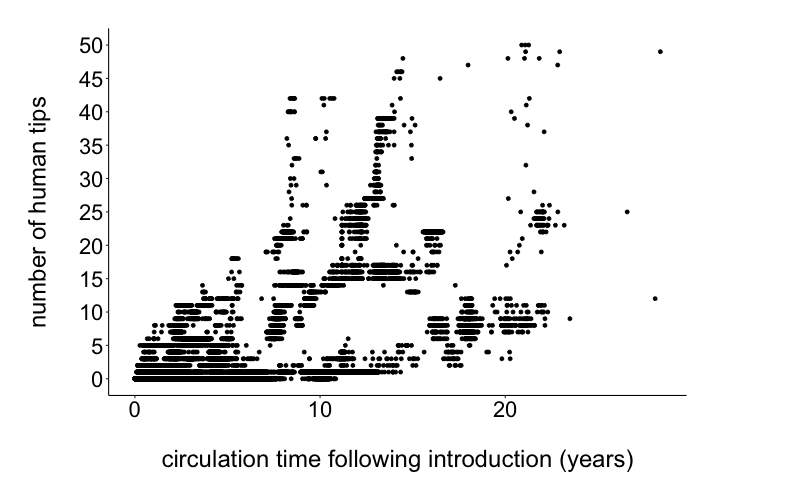

In [152]:
%%R -w 800 -h 500 -u px -i df_with_clade,current_date,clade_0_color,clade_1_color,clade_2_1_color,clade_2_2_color,clade_2_3_color,clade_2_3_4_color,clade_2_3_4_4_color,clade_other_color,clade_mixed_color # this sets the size of the plot...otherwise, it will go off the page

require(ggplot2)
library(ggplot2)
library(RColorBrewer)


output_filename = paste("circulation-time-vs-human-tips-",current_date,".png", sep="")

p <- ggplot(data=df_with_clade, aes(x=circulation_time, y=n_human_tips), alpha = 0.5, color="black") + 
    geom_point()+
    labs(x="\ncirculation time following introduction (years)", y="number of human tips\n")+
    scale_y_continuous(breaks=seq(0,50,5), limits=c(0,50))+
#      scale_x_continuous(breaks=seq(0,15,3), limits=c(0,15))+
    theme(panel.grid.major=element_line(colour=NA,size=NA))+    
    theme(panel.grid.minor=element_line(colour=NA,size=NA))+    
    theme(strip.background = element_rect(colour=NA, fill=NA))+
    theme(axis.line.x=element_line(colour="black"))+
    theme(axis.line.y=element_line(colour="black"))+
    theme(axis.title=element_text(size=24, vjust=5))+
    theme(axis.text.y=element_text(size=22, colour="black"))+
    theme(axis.text.x=element_text(size=22, colour="black", hjust=0.5))+
    theme(legend.text=element_text(size=20))+
    theme(legend.title=element_blank())+
    theme(panel.margin=unit(1, "lines"))+
    theme(plot.margin=unit(c(1,4,1,1),"cm"))+
    theme(legend.key.size=unit(0.7, "cm"))+
    theme(panel.background=element_rect(fill=NA))+
    theme(legend.key=element_rect(fill=NA))
    ##theme(legend.position = c(legend_x, legend_y))

ggsave(output_filename, width = 10, height = 6, device = "png", path = "figures", dpi = 300)
p

In [148]:
# clade_colors 
clade_2_3_4_color="#C5656E"
clade_2_3_4_4_color = "#CEB540"
clade_2_3_2_1c_color="#F9E7C3"
clade_2_3_color="#438B62"# 
clade_0_color="#2664A5"
clade_1_color = "#695B82"
clade_2_2_color="#93B2D2"
clade_2_1_color="#EEA160"
clade_other_color="#C4C2C3"
clade_mixed_color="#C4C2C3"

R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: Removed 42 rows containing missing values (`geom_point()`). 



In addition: Warning message:
Removed 42 rows containing missing values (`geom_point()`). 


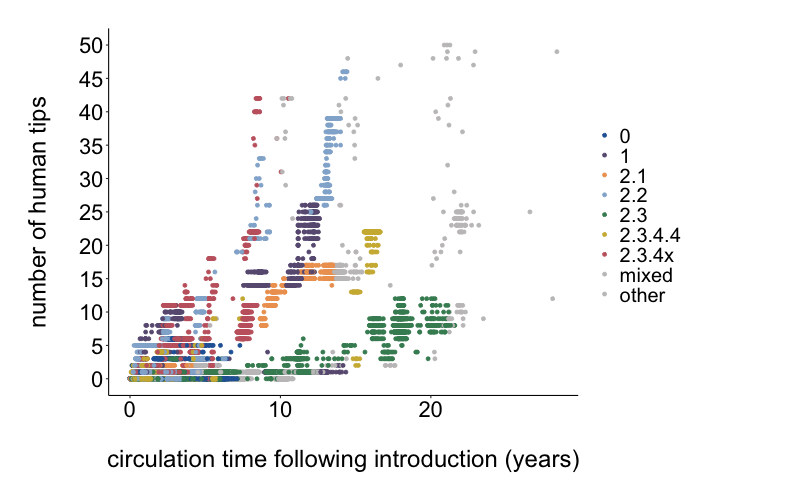

In [151]:
%%R -w 800 -h 500 -u px -i df_with_clade,current_date,clade_0_color,clade_1_color,clade_2_1_color,clade_2_2_color,clade_2_3_color,clade_2_3_4_color,clade_2_3_4_4_color,clade_other_color,clade_mixed_color # this sets the size of the plot...otherwise, it will go off the page

require(ggplot2)
library(ggplot2)
library(RColorBrewer)


output_filename = paste("circulation-time-vs-human-tips-clade-",current_date,".png", sep="")

p <- ggplot(data=df_with_clade, aes(x=circulation_time, y=n_human_tips, color=clade_group), alpha = 0.5) + 
    geom_point()+
    labs(x="\ncirculation time following introduction (years)", y="number of human tips\n")+
    scale_y_continuous(breaks=seq(0,50,5), limits=c(0,50))+
#      scale_x_continuous(breaks=seq(0,15,3), limits=c(0,15))+
    scale_color_manual(values=c("0"=clade_0_color,"1"=clade_1_color,"2.1"=clade_2_1_color,"2.2"=clade_2_2_color,"2.3"=clade_2_3_color, "2.3.4x"=clade_2_3_4_color,"2.3.4.4"=clade_2_3_4_4_color,"other"=clade_other_color, "mixed"=clade_mixed_color))+
    theme(panel.grid.major=element_line(colour=NA,size=NA))+    
    theme(panel.grid.minor=element_line(colour=NA,size=NA))+    
    theme(strip.background = element_rect(colour=NA, fill=NA))+
    theme(axis.line.x=element_line(colour="black"))+
    theme(axis.line.y=element_line(colour="black"))+
    theme(axis.title=element_text(size=24, vjust=5))+
    theme(axis.text.y=element_text(size=22, colour="black"))+
    theme(axis.text.x=element_text(size=22, colour="black", hjust=0.5))+
    theme(legend.text=element_text(size=20))+
    theme(legend.title=element_blank())+
    theme(panel.margin=unit(1, "lines"))+
    theme(plot.margin=unit(c(1,4,1,1),"cm"))+
    theme(legend.key.size=unit(0.7, "cm"))+
    theme(panel.background=element_rect(fill=NA))+
    theme(legend.key=element_rect(fill=NA))
    ##theme(legend.position = c(legend_x, legend_y))

ggsave(output_filename, width = 10, height = 6, device = "png", path = "figures", dpi = 300)
p

In [117]:
# clade_colors 
Southeast_Asia="#C5656E"
Americas="#438B62"
China="#93B2D2"
South_Asia="#F9E7C3"
Africa="#2664A5"
West_Asia="#695B82" 
Japan_Korea="#438B62"
Europe="#EEA160"

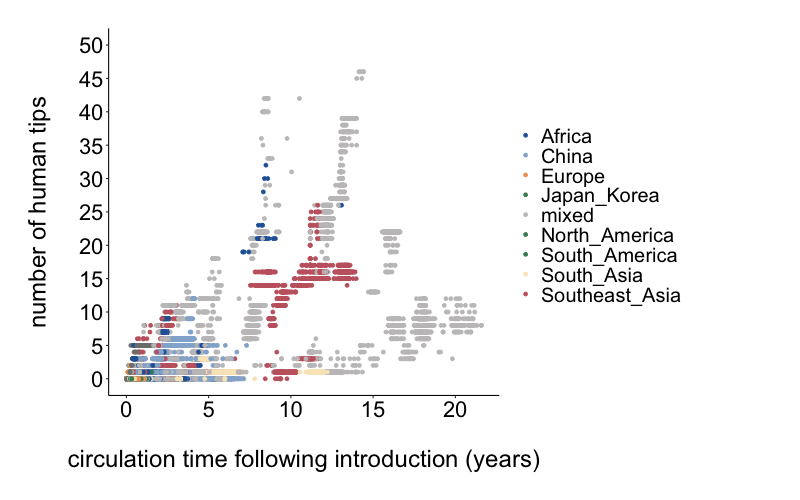

In [118]:
%%R -w 800 -h 500 -u px -i df_with_clade,Southeast_Asia,Americas,China,South_Asia,Africa,West_Asia,Japan_Korea,Europe,clade_mixed_color # this sets the size of the plot...otherwise, it will go off the page

require(ggplot2)
library(ggplot2)
library(RColorBrewer)


output_filename = paste("circulation-time-vs-human-tips-region-",current_date,".png", sep="")

p <- ggplot(data=df_with_clade, aes(x=circulation_time, y=n_human_tips, color=region_group), alpha = 0.5) + 
    geom_point()+
    labs(x="\ncirculation time following introduction (years)", y="number of human tips\n")+
    scale_y_continuous(breaks=seq(0,50,5), limits=c(0,50))+
#      scale_x_continuous(breaks=seq(0,15,3), limits=c(0,15))+
    scale_color_manual(values=c("Southeast_Asia"=Southeast_Asia,"China"=China,"South_Asia"=South_Asia,"Africa"=Africa,"Japan_Korea"=Japan_Korea, "North_America"=Americas,"South_America"=Americas,"Europe"=Europe,"other"=clade_other_color, "mixed"=clade_mixed_color))+
    theme(panel.grid.major=element_line(colour=NA,size=NA))+    
    theme(panel.grid.minor=element_line(colour=NA,size=NA))+    
    theme(strip.background = element_rect(colour=NA, fill=NA))+
    theme(axis.line.x=element_line(colour="black"))+
    theme(axis.line.y=element_line(colour="black"))+
    theme(axis.title=element_text(size=24, vjust=5))+
    theme(axis.text.y=element_text(size=22, colour="black"))+
    theme(axis.text.x=element_text(size=22, colour="black", hjust=0.5))+
    theme(legend.text=element_text(size=20))+
    theme(legend.title=element_blank())+
    theme(panel.margin=unit(1, "lines"))+
    theme(plot.margin=unit(c(1,4,1,1),"cm"))+
    theme(legend.key.size=unit(0.7, "cm"))+
    theme(panel.background=element_rect(fill=NA))+
    theme(legend.key=element_rect(fill=NA))
    ##theme(legend.position = c(legend_x, legend_y))

ggsave(output_filename, width = 10, height = 6, device = "png", path = "figures", dpi = 300)
p

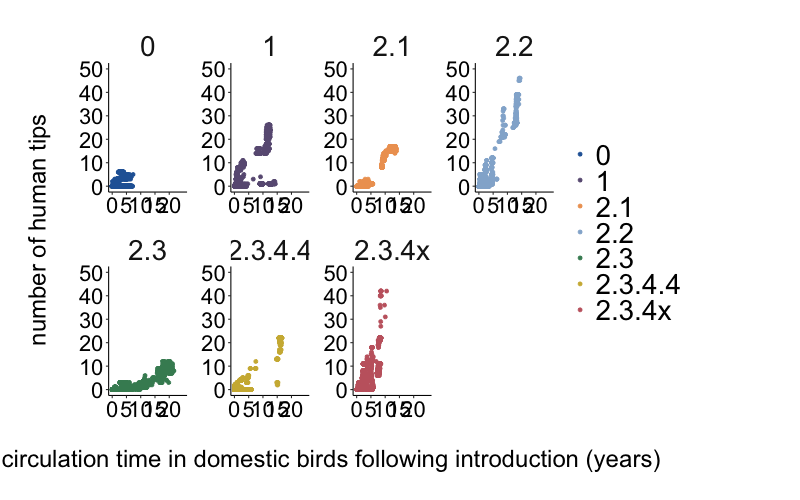

In [169]:
%%R -w 800 -h 500 -u px -i df_with_clade,current_date,clade_0_color,clade_1_color,clade_2_1_color,clade_2_2_color,clade_2_3_color,clade_2_3_4_color,clade_2_3_4_4_color,clade_other_color,clade_mixed_color # this sets the size of the plot...otherwise, it will go off the page

require(ggplot2)
library(ggplot2)
library(RColorBrewer)

df_with_clade <- df_with_clade[!(df_with_clade$clade_group=="mixed"),]
df_with_clade <- df_with_clade[!(df_with_clade$clade_group=="other"),]
df_with_clade <- df_with_clade[!(df_with_clade$clade_group=="set()"),]


output_filename = paste("circulation-time-vs-human-tips-clade-faceted-",current_date,".png", sep="")

p <- ggplot(data=df_with_clade, aes(x=circulation_time, y=n_human_tips, color=clade_group), alpha = 0.5) + 
    geom_point()+
    facet_wrap(~clade_group, ncol=4, scales="free")+
    labs(x="\ncirculation time in domestic birds following introduction (years)", y="number of human tips\n")+
    scale_y_continuous(breaks=seq(0,50,10), limits=c(0,50))+
    scale_x_continuous(breaks=seq(0,20,5), limits=c(0,25))+
    scale_color_manual(values=c("0"=clade_0_color,"1"=clade_1_color,"2.1"=clade_2_1_color,"2.2"=clade_2_2_color,"2.3"=clade_2_3_color, "2.3.4x"=clade_2_3_4_color,"2.3.4.4"=clade_2_3_4_4_color,"other"=clade_other_color, "mixed"=clade_mixed_color))+
    theme(panel.grid.major=element_line(colour=NA,size=NA))+    
    theme(panel.grid.minor=element_line(colour=NA,size=NA))+    
    theme(strip.background = element_rect(colour=NA, fill=NA))+
    theme(axis.line.x=element_line(colour="black"))+
    theme(axis.line.y=element_line(colour="black"))+
    theme(axis.title=element_text(size=24, vjust=5))+
    theme(axis.text.y=element_text(size=22, colour="black"))+
    theme(axis.text.x=element_text(size=22, colour="black", hjust=0.5))+
    theme(legend.text=element_text(size=28))+
    theme(strip.text.x = element_text(size = 28))+
    theme(legend.title=element_blank())+
    theme(panel.margin=unit(1, "lines"))+
    theme(plot.margin=unit(c(1,4,1,1),"cm"))+
    theme(legend.key.size=unit(0.7, "cm"))+
    theme(panel.background=element_rect(fill=NA))+
    theme(legend.key=element_rect(fill=NA))
    ##theme(legend.position = c(legend_x, legend_y))

ggsave(output_filename, width = 16, height = 8, device = "png", path = "figures", dpi = 300)
p

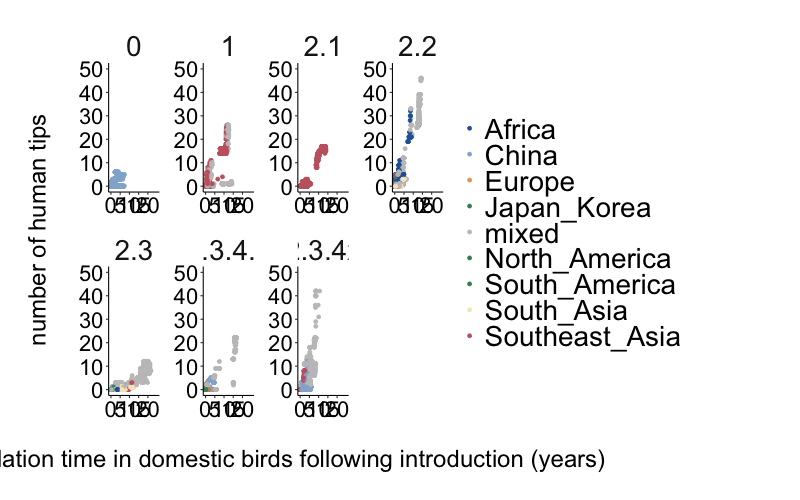

In [170]:
%%R -w 800 -h 500 -u px -i df_with_clade,Southeast_Asia,Americas,China,South_Asia,Africa,West_Asia,Japan_Korea,Europe,clade_mixed_color # this sets the size of the plot...otherwise, it will go off the page

require(ggplot2)
library(ggplot2)
library(RColorBrewer)

df_with_clade <- df_with_clade[!(df_with_clade$clade_group=="mixed"),]
df_with_clade <- df_with_clade[!(df_with_clade$clade_group=="other"),]
df_with_clade <- df_with_clade[!(df_with_clade$clade_group=="set()"),]


output_filename = paste("circulation-time-vs-human-tips-clade-faceted-color-region-",current_date,".png", sep="")

p <- ggplot(data=df_with_clade, aes(x=circulation_time, y=n_human_tips, color=region_group), alpha = 0.5) + 
    geom_point()+
    facet_wrap(~clade_group, ncol=4, scales="free")+
    labs(x="\ncirculation time in domestic birds following introduction (years)", y="number of human tips\n")+
    scale_y_continuous(breaks=seq(0,50,10), limits=c(0,50))+
    scale_x_continuous(breaks=seq(0,20,5), limits=c(0,25))+
    scale_color_manual(values=c("Southeast_Asia"=Southeast_Asia,"China"=China,"South_Asia"=South_Asia,"Africa"=Africa,"Japan_Korea"=Japan_Korea, "North_America"=Americas,"South_America"=Americas,"Europe"=Europe,"other"=clade_other_color, "mixed"=clade_mixed_color))+
    theme(panel.grid.major=element_line(colour=NA,size=NA))+    
    theme(panel.grid.minor=element_line(colour=NA,size=NA))+    
    theme(strip.background = element_rect(colour=NA, fill=NA))+
    theme(axis.line.x=element_line(colour="black"))+
    theme(axis.line.y=element_line(colour="black"))+
    theme(axis.title=element_text(size=24, vjust=5))+
    theme(axis.text.y=element_text(size=22, colour="black"))+
    theme(axis.text.x=element_text(size=22, colour="black", hjust=0.5))+
    theme(legend.text=element_text(size=28))+
    theme(strip.text.x = element_text(size = 28))+
    theme(legend.title=element_blank())+
    theme(panel.margin=unit(1, "lines"))+
    theme(plot.margin=unit(c(1,4,1,1),"cm"))+
    theme(legend.key.size=unit(0.7, "cm"))+
    theme(panel.background=element_rect(fill=NA))+
    theme(legend.key=element_rect(fill=NA))
    ##theme(legend.position = c(legend_x, legend_y))

ggsave(output_filename, width = 16, height = 8, device = "png", path = "figures", dpi = 300)
p

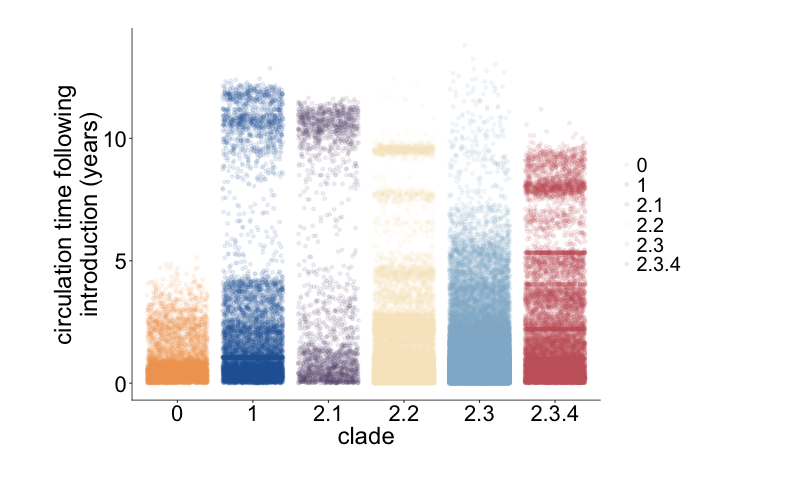

In [137]:
%%R -w 800 -h 500 -u px -i df_with_clade,current_date,clade_0_color,clade_1_color,clade_2_1_color,clade_2_2_color,clade_2_3_color,clade_2_3_4_color,clade_other_color # this sets the size of the plot...otherwise, it will go off the page

require(ggplot2)
library(ggplot2)
library(RColorBrewer)


output_filename = paste("circulation-time-by-clade-faceted-",current_date,".png", sep="")

p <- ggplot(data=df_with_clade, aes(x=clade_group, y=circulation_time, color=clade_group)) + 
    #geom_density(size=1.5)+
    geom_jitter(alpha=0.1)+
    labs(y="\ncirculation time following\nintroduction (years)", x="clade\n")+
#      scale_y_continuous(breaks=seq(0,40,5), limits=c(0,40))+
#      scale_x_continuous(breaks=seq(0,15,3), limits=c(0,15))+
    scale_color_manual(values=c("0"=clade_0_color,"1"=clade_1_color,"2.1"=clade_2_1_color,"2.2"=clade_2_2_color,"2.3"=clade_2_3_color, "2.3.4"=clade_2_3_4_color,"other"=clade_other_color))+
    theme(panel.grid.major=element_line(colour=NA,size=NA))+    
    theme(panel.grid.minor=element_line(colour=NA,size=NA))+    
    theme(strip.background = element_rect(colour=NA, fill=NA))+
    theme(axis.line.x=element_line(colour="black"))+
    theme(axis.line.y=element_line(colour="black"))+
    theme(axis.title=element_text(size=24, vjust=5))+
    theme(axis.text.y=element_text(size=22, colour="black"))+
    theme(axis.text.x=element_text(size=22, colour="black", hjust=0.5))+
    theme(legend.text=element_text(size=20))+
    theme(legend.title=element_blank())+
    theme(panel.margin=unit(1, "lines"))+
    theme(plot.margin=unit(c(1,4,1,1),"cm"))+
    theme(legend.key.size=unit(0.7, "cm"))+
    theme(panel.background=element_rect(fill=NA))+
    theme(legend.key=element_rect(fill=NA))
    ##theme(legend.position = c(legend_x, legend_y))

ggsave(output_filename, width = 10, height = 6, device = "png", path = "figures", dpi = 300)
p

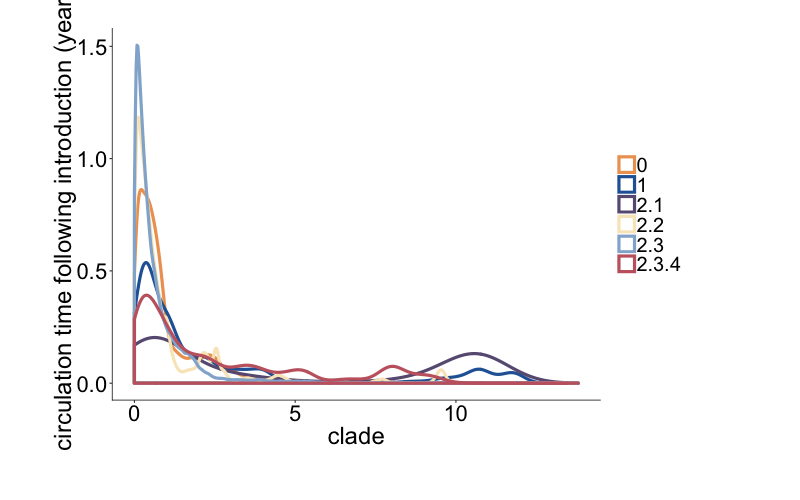

In [134]:
%%R -w 800 -h 500 -u px -i df_with_clade,current_date,clade_0_color,clade_1_color,clade_2_1_color,clade_2_2_color,clade_2_3_color,clade_2_3_4_color,clade_other_color # this sets the size of the plot...otherwise, it will go off the page

require(ggplot2)
library(ggplot2)
library(RColorBrewer)


output_filename = paste("circulation-time-by-clade-density",current_date,".png", sep="")

p <- ggplot(data=df_with_clade, aes(x=circulation_time, color=clade_group)) + 
    geom_density(size=1.5)+
    labs(x="\ncirculation time following introduction (years)")+
#      scale_y_continuous(breaks=seq(0,40,5), limits=c(0,40))+
#      scale_x_continuous(breaks=seq(0,15,3), limits=c(0,15))+
    scale_color_manual(values=c("0"=clade_0_color,"1"=clade_1_color,"2.1"=clade_2_1_color,"2.2"=clade_2_2_color,"2.3"=clade_2_3_color, "2.3.4"=clade_2_3_4_color,"other"=clade_other_color))+
    theme(panel.grid.major=element_line(colour=NA,size=NA))+    
    theme(panel.grid.minor=element_line(colour=NA,size=NA))+    
    theme(strip.background = element_rect(colour=NA, fill=NA))+
    theme(axis.line.x=element_line(colour="black"))+
    theme(axis.line.y=element_line(colour="black"))+
    theme(axis.title=element_text(size=24, vjust=5))+
    theme(axis.text.y=element_text(size=22, colour="black"))+
    theme(axis.text.x=element_text(size=22, colour="black", hjust=0.5))+
    theme(legend.text=element_text(size=20))+
    theme(legend.title=element_blank())+
    theme(panel.margin=unit(1, "lines"))+
    theme(plot.margin=unit(c(1,4,1,1),"cm"))+
    theme(legend.key.size=unit(0.7, "cm"))+
    theme(panel.background=element_rect(fill=NA))+
    theme(legend.key=element_rect(fill=NA))
    ##theme(legend.position = c(legend_x, legend_y))

ggsave(output_filename, width = 10, height = 6, device = "png", path = "figures", dpi = 300)
p

In [138]:
# how many of these clusters are found frequently across the posterior 
x = pd.DataFrame(df_with_clade['tips_in_subtree'].value_counts())
print(type(x))
x.reset_index(inplace=True)
x = x.rename(columns={"index":"tips_in_subtree","tips_in_subtree":"times_cluster_in_posterior"})
x.head()

<class 'pandas.core.frame.DataFrame'>


,tips_in_subtree,times_cluster_in_posterior
0,['A/chicken/Shimane/1/2010|2010.833|2010-11-XX...,1133
1,['A/chicken/Subang/08160018-002/2016|2016.019|...,1133
2,['A/chicken/Myanmar/CS-13/2017|2017.959|2017-1...,1130
3,['A/duck/India/03CA01/2015|2015.162|2015-03-XX...,1130
4,['A/duck/Bangladesh/22806/2014|2014.471|2014-0...,1128


In [139]:
print(len(df_with_clade))
merged = df_with_clade.merge(x)
print(len(merged))
merged.head()

152062
152062


,Unnamed: 0,tree_number,subtree_number,circulation_time,n_human_tips,tips_in_subtree,clade_group,region_group,n_tips_in_subtree,human_tips,times_cluster_in_posterior
0,0,1,1,0.705697,0,['A/Goose/Guangdong/1/1996|1996.0|1996-XX-XX|A...,0,China,1,0,936
1,0,3,1,0.208335,0,['A/Goose/Guangdong/1/1996|1996.0|1996-XX-XX|A...,0,China,1,0,936
2,0,4,3,0.813138,0,['A/Goose/Guangdong/1/1996|1996.0|1996-XX-XX|A...,0,China,1,0,936
3,0,5,3,0.681485,0,['A/Goose/Guangdong/1/1996|1996.0|1996-XX-XX|A...,0,China,1,0,936
4,0,6,2,0.550684,0,['A/Goose/Guangdong/1/1996|1996.0|1996-XX-XX|A...,0,China,1,0,936


In [140]:
# subset this to only the unique clusters 
# merged.drop_duplicates('tips_in_subtree', inplace=True)
# merged.reset_index(inplace=True)
# print(len(merged))

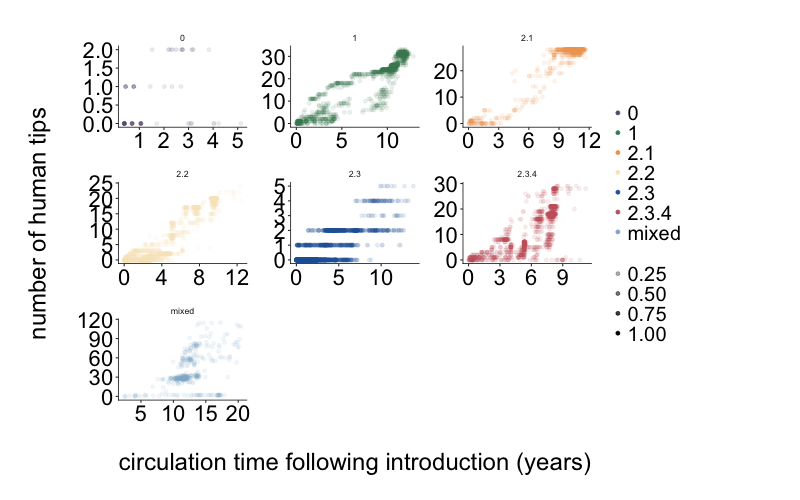

In [102]:
%%R -w 800 -h 500 -u px -i merged,current_date,clade_0_color,clade_1_color,clade_2_1_color,clade_2_2_color,clade_2_3_color,clade_2_3_4_color,clade_mixed_color # this sets the size of the plot...otherwise, it will go off the page

require(ggplot2)
library(ggplot2)
library(RColorBrewer)


output_filename = paste("circulation-time-vs-human-tips-clade-unique-clusters-faceted-",current_date,".png", sep="")

p <- ggplot(data=merged, aes(x=circulation_time, y=n_human_tips, color=clade_group, alpha=times_cluster_in_posterior/1133)) + 
    geom_point()+
    facet_wrap(~clade_group, scales="free")+
    labs(x="\ncirculation time following introduction (years)", y="number of human tips\n")+
#      scale_y_continuous(breaks=seq(0,40,5), limits=c(0,40))+
#      scale_x_continuous(breaks=seq(0,15,3), limits=c(0,15))+
    scale_color_manual(values=c("0"=clade_0_color,"1"=clade_1_color,"2.1"=clade_2_1_color,"2.2"=clade_2_2_color,"2.3"=clade_2_3_color, "2.3.4"=clade_2_3_4_color,"mixed"=clade_mixed_color))+
    theme(panel.grid.major=element_line(colour=NA,size=NA))+    
    theme(panel.grid.minor=element_line(colour=NA,size=NA))+    
    theme(strip.background = element_rect(colour=NA, fill=NA))+
    theme(axis.line.x=element_line(colour="black"))+
    theme(axis.line.y=element_line(colour="black"))+
    theme(axis.title=element_text(size=24, vjust=5))+
    theme(axis.text.y=element_text(size=22, colour="black"))+
    theme(axis.text.x=element_text(size=22, colour="black", hjust=0.5))+
    theme(legend.text=element_text(size=20))+
    theme(legend.title=element_blank())+
    theme(panel.margin=unit(1, "lines"))+
    theme(plot.margin=unit(c(1,4,1,1),"cm"))+
    theme(legend.key.size=unit(0.7, "cm"))+
    theme(panel.background=element_rect(fill=NA))+
    theme(legend.key=element_rect(fill=NA))
    ##theme(legend.position = c(legend_x, legend_y))

ggsave(output_filename, width = 16, height = 12, device = "png", path = "figures", dpi = 300)
p

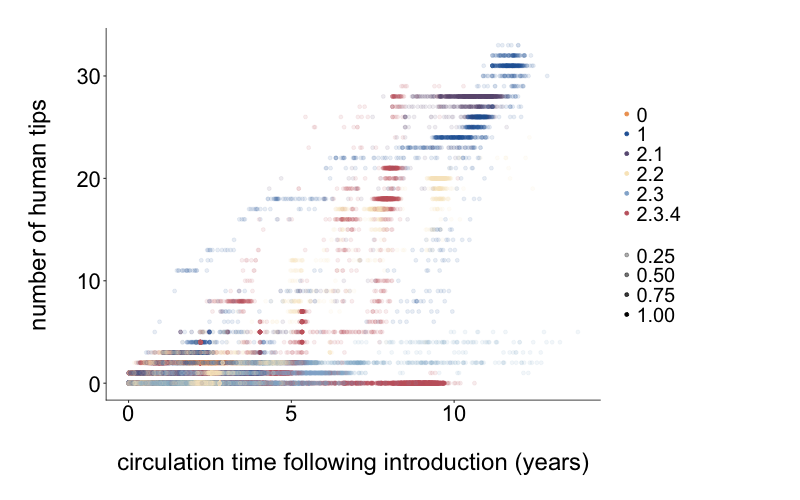

In [141]:
%%R -w 800 -h 500 -u px -i merged,current_date,clade_0_color,clade_1_color,clade_2_1_color,clade_2_2_color,clade_2_3_color,clade_2_3_4_color,clade_mixed_color # this sets the size of the plot...otherwise, it will go off the page

require(ggplot2)
library(ggplot2)
library(RColorBrewer)


output_filename = paste("circulation-time-vs-human-tips-clade-with-cluster-freq-",current_date,".png", sep="")

p <- ggplot(data=merged, aes(x=circulation_time, y=n_human_tips, color=clade_group, alpha=times_cluster_in_posterior/1133)) + 
    geom_point()+
    labs(x="\ncirculation time following introduction (years)", y="number of human tips\n")+
#      scale_y_continuous(breaks=seq(0,40,5), limits=c(0,40))+
#      scale_x_continuous(breaks=seq(0,15,3), limits=c(0,15))+
    scale_color_manual(values=c("0"=clade_0_color,"1"=clade_1_color,"2.1"=clade_2_1_color,"2.2"=clade_2_2_color,"2.3"=clade_2_3_color, "2.3.4"=clade_2_3_4_color,"mixed"=clade_mixed_color))+
    theme(panel.grid.major=element_line(colour=NA,size=NA))+    
    theme(panel.grid.minor=element_line(colour=NA,size=NA))+    
    theme(strip.background = element_rect(colour=NA, fill=NA))+
    theme(axis.line.x=element_line(colour="black"))+
    theme(axis.line.y=element_line(colour="black"))+
    theme(axis.title=element_text(size=24, vjust=5))+
    theme(axis.text.y=element_text(size=22, colour="black"))+
    theme(axis.text.x=element_text(size=22, colour="black", hjust=0.5))+
    theme(legend.text=element_text(size=20))+
    theme(legend.title=element_blank())+
    theme(panel.margin=unit(1, "lines"))+
    theme(plot.margin=unit(c(1,4,1,1),"cm"))+
    theme(legend.key.size=unit(0.7, "cm"))+
    theme(panel.background=element_rect(fill=NA))+
    theme(legend.key=element_rect(fill=NA))
    ##theme(legend.position = c(legend_x, legend_y))

ggsave(output_filename, width = 10, height = 6, device = "png", path = "figures", dpi = 300)
p

## Conclusions 

So what all of this is telling me is the following: 

* we have very few clusters that are consistently resolved across the posterior. Even requiring the cluster to be present in at least 10% of sampled trees eliminated about half of the clusters. Requiring the clusters to be in 50% of trees eliminated 75% of the clusters. 
* in some ways this makes sense, because there are going to be small differences in where the cross species transmission event gets called, and there will be times when a wacky tree happens, where there are way too many inferred human tips. A cluster will be different even if a single tip is different (so for example, if the cross-species transmission branch is moved 1 more basal or 1 more terminal). 
* leafing through the posterior, there are a few odd trees where too much of interior backbone is inferred as domestic, and then you get transmission back into wild.This is what causes the huge clusters with tons of human tips. 
* for the regression, I'm not sure that this is a problem, because more probable clusters will be present more frequently in the dataframe that we are regressing on. For visualization though, it might bbe good to have a way to show how well supported the clusters are. 

## Plotting: tips/introduction by clade

In [19]:
df_with_clade.head()

,Unnamed: 0,tree_number,subtree_number,circulation_time,n_human_tips,tips_in_subtree,clade_group,region_group,n_tips_in_subtree,human_tips
0,0,1,1,0.705697,0,['A/Goose/Guangdong/1/1996|1996.0|1996-XX-XX|A...,0,China,1,0
1,0,3,1,0.208335,0,['A/Goose/Guangdong/1/1996|1996.0|1996-XX-XX|A...,0,China,1,0
2,0,4,3,0.813138,0,['A/Goose/Guangdong/1/1996|1996.0|1996-XX-XX|A...,0,China,1,0
3,0,5,3,0.681485,0,['A/Goose/Guangdong/1/1996|1996.0|1996-XX-XX|A...,0,China,1,0
4,0,6,2,0.550684,0,['A/Goose/Guangdong/1/1996|1996.0|1996-XX-XX|A...,0,China,1,0


In [20]:
# clade_colors 
clade_2_3_4_color="#C5656E"
clade_1_color="#2664A5"
clade_2_1_color="#695B82"
clade_2_2_color="#F9E7C3"
clade_2_3_color="#93B2D2"
clade_0_color="#EEA160"
clade_other_color="#438B62"

In [21]:
# remove rows with other; these are all very small clades that are sort of odd, and I don't think we need to include them 
print(len(df_with_clade))
df_with_clade2 = df_with_clade[df_with_clade['clade_group']!='other']
df_with_clade2 = df_with_clade[df_with_clade['clade_group']!='mixed']

print(len(df_with_clade2))

161168
160734


In [22]:
tips_in_tree_per_clade_group = {'2.3': 183, '2.3.4': 67, '2.2': 164, 'other': 17, '2.1': 40, '1': 72, '0': 6}

In [27]:
intros_per_clade_per_tree = pd.DataFrame()
intros_per_tree = pd.DataFrame()

for tree in set(df_with_clade['tree_number'].tolist()):
    local_df = df_with_clade[df_with_clade['tree_number'] == tree]
    n_intros_in_tree = len(local_df)
    new_row1 = pd.DataFrame({"tree_number":[tree], "n_intros":n_intros_in_tree})
    intros_per_tree = intros_per_tree.append(new_row1)
    
    for clade in tips_in_tree_per_clade_group:
        n_intros = len(local_df[local_df['clade_group'] == clade])
        
        if n_intros > 0:
            tips_over_intros = tips_in_tree_per_clade_group[clade]/n_intros
        
            new_row = pd.DataFrame({"tree_number":[tree], "clade_group":clade, "n_intros":n_intros, 
                                    "tips_over_intros":tips_over_intros})
            
            intros_per_clade_per_tree = intros_per_clade_per_tree.append(new_row)

intros_per_clade_per_tree.head()

,tree_number,clade_group,n_intros,tips_over_intros
0,1,2.3,88,2.079545
0,1,2.3.4,5,13.400000
0,1,2.2,20,8.200000
0,1,other,6,2.833333
0,1,1,4,18.000000


In [28]:
intros_per_tree.head()

,tree_number,n_intros
0,1,129
0,2,129
0,3,165
0,4,135
0,5,151


In [66]:
import pymc3
from scipy.stats import norm
hpd = pymc3.stats.hpd(intros_per_tree['n_intros'])
lower_hpd = hpd[0]
upper_hpd = hpd[1]
print(min(intros_per_tree['n_intros']), max(intros_per_tree['n_intros']))
print(hpd)

64 212
[ 94 178]


 ## Total intros (regardless of clade) across the posterior 

In [31]:
n_trees_in_posterior = len(intros_per_tree)
print(n_trees_in_posterior)

1133


In [46]:
# convert to proportions for plotting
counts_per_intro_size = pd.DataFrame(intros_per_tree['n_intros'].value_counts())
counts_per_intro_size.reset_index(inplace=True)
counts_per_intro_size.rename(columns={"index":"n_intros","n_intros":"number_of_trees"}, inplace=True)
counts_per_intro_size["proportion_trees"] = counts_per_intro_size['number_of_trees']/n_trees_in_posterior
counts_per_intro_size['n_intros'] = pd.to_numeric(counts_per_intro_size['n_intros'])
counts_per_intro_size.head()

,n_intros,number_of_trees,proportion_trees
0,144,32,0.028244
1,149,27,0.023831
2,146,26,0.022948
3,153,26,0.022948
4,154,25,0.022065


/Users/lmoncla/anaconda/envs/LHM-basics/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

  warnings.warn(x, RRuntimeWarning)


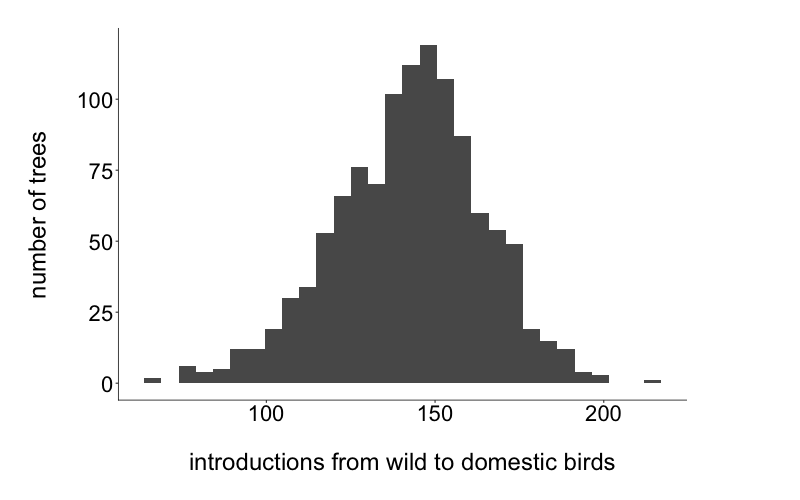

In [51]:
%%R -w 800 -h 500 -u px -i intros_per_tree,current_date,clade_0_color,clade_1_color,clade_2_1_color,clade_2_2_color,clade_2_3_color,clade_2_3_4_color,clade_other_color # this sets the size of the plot...otherwise, it will go off the page

require(ggplot2)
library(ggplot2)
library(RColorBrewer)


output_filename = paste("intros-over-posterior-",current_date,".png", sep="")

p <- ggplot(data=intros_per_tree, aes(x=n_intros)) + 
    geom_histogram()+
    #facet_wrap(~clade_group, scales="free")+
    labs(x="\nintroductions from wild to domestic birds", y="number of trees\n")+
    #scale_y_continuous(breaks=seq(0,1,0.1), limits=c(0,1))+
    #scale_x_continuous(breaks=seq(0,15,3), limits=c(0,15))+
    scale_color_manual(values=c("0"=clade_0_color,"1"=clade_1_color,"2.1"=clade_2_1_color,"2.2"=clade_2_2_color,"2.3"=clade_2_3_color, "2.3.4"=clade_2_3_4_color,"other"=clade_other_color))+
    theme(panel.grid.major=element_line(colour=NA,size=NA))+    
    theme(panel.grid.minor=element_line(colour=NA,size=NA))+    
    theme(strip.background = element_rect(colour=NA, fill=NA))+
    theme(axis.line.x=element_line(colour="black"))+
    theme(axis.line.y=element_line(colour="black"))+
    theme(axis.title=element_text(size=24, vjust=5))+
    theme(axis.text.y=element_text(size=22, colour="black"))+
    theme(axis.text.x=element_text(size=22, colour="black", hjust=0.5))+
    theme(legend.text=element_text(size=20))+
    theme(legend.title=element_blank())+
    theme(panel.margin=unit(1, "lines"))+
    theme(plot.margin=unit(c(1,4,1,1),"cm"))+
    theme(legend.key.size=unit(0.7, "cm"))+
    theme(panel.background=element_rect(fill=NA))+
    theme(legend.key=element_rect(fill=NA))
    ##theme(legend.position = c(legend_x, legend_y))

ggsave(output_filename, width = 12, height = 6, device = "png", path = "figures", dpi = 300)
p

In [72]:
# colorby hpd 
in_hpd = counts_per_intro_size[(counts_per_intro_size['n_intros'] >= lower_hpd)&((counts_per_intro_size['n_intros'] <= upper_hpd))]
not_in_hpd = counts_per_intro_size[~((counts_per_intro_size['n_intros'] >= lower_hpd)&((counts_per_intro_size['n_intros'] <= upper_hpd)))]

#counts_per_intro_size['colorby'] = np.where(counts_per_intro_size['n_intros'] >= lower_hpd, "95% hpd","not")
in_hpd['colorby'] = 'in_hpd'
not_in_hpd['colorby'] = 'not'

print(len(counts_per_intro_size), len(in_hpd), len(not_in_hpd), len(in_hpd)+len(not_in_hpd))
#counts_per_intro_size.head()

118 85 33 118


/Users/lmoncla/anaconda/envs/LHM-basics/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/lmoncla/anaconda/envs/LHM-basics/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [74]:
counts_per_intro_size_w_colorby = in_hpd.append(not_in_hpd)
counts_per_intro_size_w_colorby.head()

,n_intros,number_of_trees,proportion_trees,colorby
0,144,32,0.028244,in_hpd
1,149,27,0.023831,in_hpd
2,146,26,0.022948,in_hpd
3,153,26,0.022948,in_hpd
4,154,25,0.022065,in_hpd


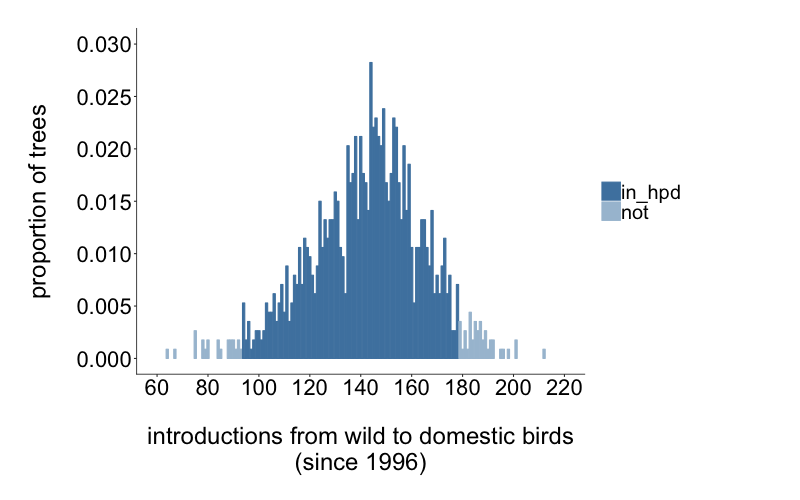

In [79]:
%%R -w 800 -h 500 -u px -i counts_per_intro_size_w_colorby,current_date,domestic_color # this sets the size of the plot...otherwise, it will go off the page

require(ggplot2)
library(ggplot2)
library(RColorBrewer)


output_filename = paste("intros-over-posterior-",current_date,".png", sep="")

p <- ggplot(data=counts_per_intro_size_w_colorby, aes(x=n_intros, y=proportion_trees, color=colorby, fill=colorby)) + 
    geom_col()+
    #facet_wrap(~clade_group, scales="free")+
    labs(x="\nintroductions from wild to domestic birds\n(since 1996)", y="proportion of trees\n")+
    scale_y_continuous(breaks=seq(0,0.03,0.005), limits=c(0,0.03))+
    scale_x_continuous(breaks=seq(60,220,20), limits=c(60,220))+
    scale_color_manual(values=c(in_hpd=domestic_color,not="#A7C1D6"))+
    scale_fill_manual(values=c(in_hpd=domestic_color,not="#A7C1D6"))+
    theme(panel.grid.major=element_line(colour=NA,size=NA))+    
    theme(panel.grid.minor=element_line(colour=NA,size=NA))+    
    theme(strip.background = element_rect(colour=NA, fill=NA))+
    theme(axis.line.x=element_line(colour="black"))+
    theme(axis.line.y=element_line(colour="black"))+
    theme(axis.title=element_text(size=24, vjust=5))+
    theme(axis.text.y=element_text(size=22, colour="black"))+
    theme(axis.text.x=element_text(size=22, colour="black", hjust=0.5))+
    theme(legend.text=element_text(size=20))+
    theme(legend.title=element_blank())+
    theme(panel.margin=unit(1, "lines"))+
    theme(plot.margin=unit(c(1,4,1,1),"cm"))+
    theme(legend.key.size=unit(0.7, "cm"))+
    theme(panel.background=element_rect(fill=NA))+
    theme(legend.key=element_rect(fill=NA))
    ##theme(legend.position = c(legend_x, legend_y))

ggsave(output_filename, width = 12, height = 6, device = "png", path = "figures", dpi = 300)
p

### Overall introductions: 

These estimates are somewhat diffuse, with a 95% HPD of 94-178. This tree spans from 1996-2019 = 23 years of data. So we estimate anywhere from 4-8 introductions on average per year. This is definitely not constant over time, but is sort of a high rate of introductions. There is definitely some real noise in the data, because inferring the introductions is not completely resolved across the posterior. However, this feels like a reasonable enough estimate to report to me. 

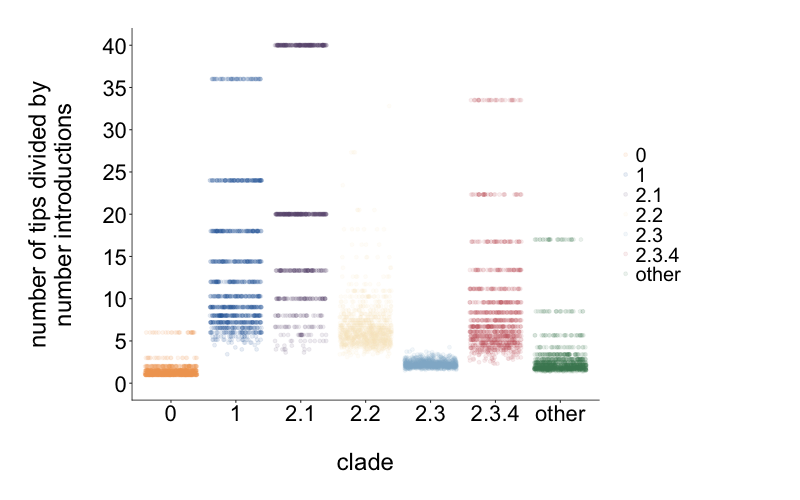

In [97]:
%%R -w 800 -h 500 -u px -i output_df,current_date,clade_0_color,clade_1_color,clade_2_1_color,clade_2_2_color,clade_2_3_color,clade_2_3_4_color,clade_other_color # this sets the size of the plot...otherwise, it will go off the page

require(ggplot2)
library(ggplot2)
library(RColorBrewer)


output_filename = paste("tips-per-intro-by-clade-",current_date,".png", sep="")

p <- ggplot(data=output_df, aes(x=clade_group, y=tips_over_intros, color=clade_group), alpha = 0.3) + 
    geom_jitter(alpha=0.1)+
    #facet_wrap(~clade_group, scales="free")+
    labs(x="\nclade", y="number of tips divided by\nnumber introductions\n")+
    scale_y_continuous(breaks=seq(0,40,5), limits=c(0,40))+
#      scale_x_continuous(breaks=seq(0,15,3), limits=c(0,15))+
    scale_color_manual(values=c("0"=clade_0_color,"1"=clade_1_color,"2.1"=clade_2_1_color,"2.2"=clade_2_2_color,"2.3"=clade_2_3_color, "2.3.4"=clade_2_3_4_color,"other"=clade_other_color))+
    theme(panel.grid.major=element_line(colour=NA,size=NA))+    
    theme(panel.grid.minor=element_line(colour=NA,size=NA))+    
    theme(strip.background = element_rect(colour=NA, fill=NA))+
    theme(axis.line.x=element_line(colour="black"))+
    theme(axis.line.y=element_line(colour="black"))+
    theme(axis.title=element_text(size=24, vjust=5))+
    theme(axis.text.y=element_text(size=22, colour="black"))+
    theme(axis.text.x=element_text(size=22, colour="black", hjust=0.5))+
    theme(legend.text=element_text(size=20))+
    theme(legend.title=element_blank())+
    theme(panel.margin=unit(1, "lines"))+
    theme(plot.margin=unit(c(1,4,1,1),"cm"))+
    theme(legend.key.size=unit(0.7, "cm"))+
    theme(panel.background=element_rect(fill=NA))+
    theme(legend.key=element_rect(fill=NA))
    ##theme(legend.position = c(legend_x, legend_y))

ggsave(output_filename, width = 12, height = 6, device = "png", path = "figures", dpi = 300)
p

## Control: is the number of introductions correlated with the number of wild sequences per clade? 

In [106]:
tips_per_host_per_clade = {'2.3': {'human': 7, 'domestic': 132, 'wild': 44, 'total': 183}, 
                           '2.3.4': {'human': 29, 'domestic': 31, 'wild': 7, 'total': 67}, 
                           '2.2': {'human': 24, 'domestic': 112, 'wild': 28, 'total': 164}, 
                           'other': {'human': 2, 'domestic': 13, 'wild': 2, 'total': 17}, 
                           '2.1': {'human': 28, 'domestic': 12, 'wild': 0, 'total': 40}, 
                           '1': {'human': 33, 'domestic': 29, 'wild': 10, 'total': 72}, 
                           '0': {'human': 2, 'domestic': 4, 'wild': 0, 'total': 6}}

control_df = pd.DataFrame.from_dict(tips_per_host_per_clade, orient="index")
control_df.reset_index(inplace=True)
control_df.rename(columns = {"index":"clade_group"}, inplace=True)
control_df.head()

,clade_group,human,domestic,wild,total
0,2.3,7,132,44,183
1,2.3.4,29,31,7,67
2,2.2,24,112,28,164
3,other,2,13,2,17
4,2.1,28,12,0,40


In [108]:
control_df2 = output_df.merge(control_df, on="clade_group")
control_df2.head()

,tree_number,clade_group,n_intros,tips_over_intros,human,domestic,wild,total
0,1,2.3,88,2.079545,7,132,44,183
1,2,2.3,77,2.376623,7,132,44,183
2,3,2.3,99,1.848485,7,132,44,183
3,4,2.3,82,2.231707,7,132,44,183
4,5,2.3,82,2.231707,7,132,44,183


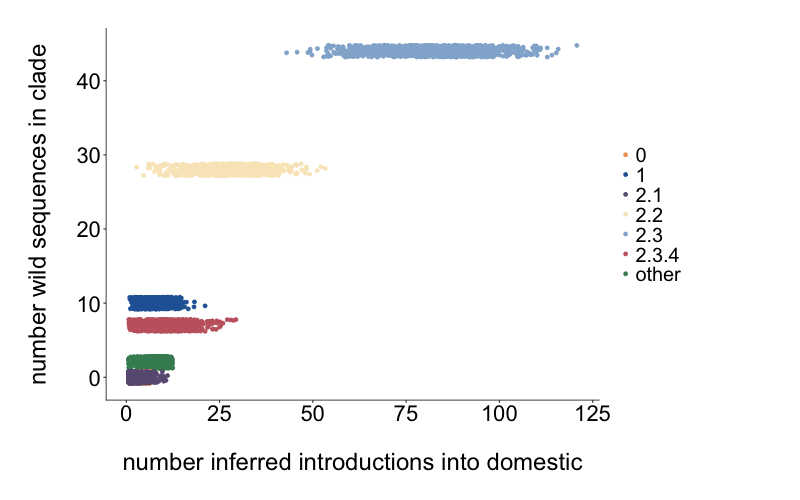

In [111]:
%%R -w 800 -h 500 -u px -i control_df2,current_date,clade_0_color,clade_1_color,clade_2_1_color,clade_2_2_color,clade_2_3_color,clade_2_3_4_color,clade_other_color # this sets the size of the plot...otherwise, it will go off the page

require(ggplot2)
library(ggplot2)
library(RColorBrewer)


output_filename = paste("intros-vs-wild-seqs-",current_date,".png", sep="")

p <- ggplot(data=control_df2, aes(x=n_intros, y=wild, color=clade_group)) + 
    geom_jitter()+
    #facet_wrap(~clade_group, scales="free")+
    labs(x="\nnumber inferred introductions into domestic", y="number wild sequences in clade\n")+
#     scale_y_continuous(breaks=seq(0,40,5), limits=c(0,40))+
#      scale_x_continuous(breaks=seq(0,15,3), limits=c(0,15))+
    scale_color_manual(values=c("0"=clade_0_color,"1"=clade_1_color,"2.1"=clade_2_1_color,"2.2"=clade_2_2_color,"2.3"=clade_2_3_color, "2.3.4"=clade_2_3_4_color,"other"=clade_other_color))+
    theme(panel.grid.major=element_line(colour=NA,size=NA))+    
    theme(panel.grid.minor=element_line(colour=NA,size=NA))+    
    theme(strip.background = element_rect(colour=NA, fill=NA))+
    theme(axis.line.x=element_line(colour="black"))+
    theme(axis.line.y=element_line(colour="black"))+
    theme(axis.title=element_text(size=24, vjust=5))+
    theme(axis.text.y=element_text(size=22, colour="black"))+
    theme(axis.text.x=element_text(size=22, colour="black", hjust=0.5))+
    theme(legend.text=element_text(size=20))+
    theme(legend.title=element_blank())+
    theme(panel.margin=unit(1, "lines"))+
    theme(plot.margin=unit(c(1,4,1,1),"cm"))+
    theme(legend.key.size=unit(0.7, "cm"))+
    theme(panel.background=element_rect(fill=NA))+
    theme(legend.key=element_rect(fill=NA))
    ##theme(legend.position = c(legend_x, legend_y))

ggsave(output_filename, width = 12, height = 6, device = "png", path = "figures", dpi = 300)
p

/Users/lmoncla/anaconda/envs/LHM-basics/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)


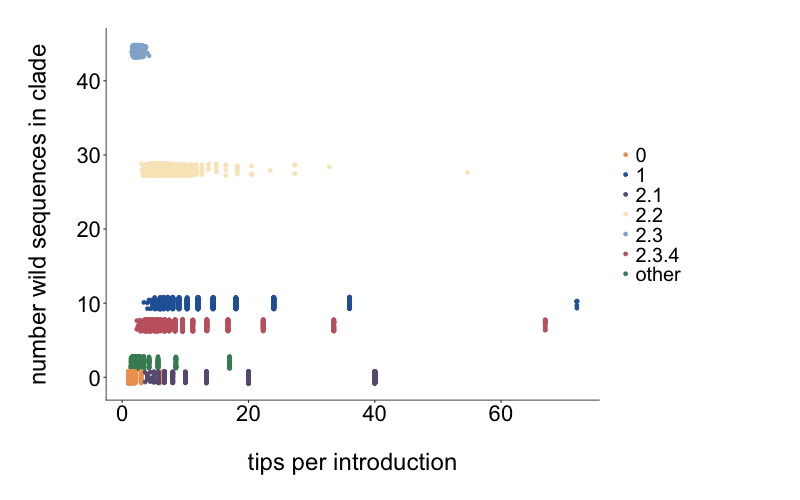

In [115]:
%%R -w 800 -h 500 -u px -i control_df2,current_date,clade_0_color,clade_1_color,clade_2_1_color,clade_2_2_color,clade_2_3_color,clade_2_3_4_color,clade_other_color # this sets the size of the plot...otherwise, it will go off the page

require(ggplot2)
library(ggplot2)
library(RColorBrewer)


output_filename = paste("tips-per-intro-vs-wild-seqs-",current_date,".png", sep="")

p <- ggplot(data=control_df2, aes(x=tips_over_intros, y=wild, color=clade_group)) + 
    geom_jitter()+
    #facet_wrap(~clade_group, scales="free")+
    labs(x="\ntips per introduction", y="number wild sequences in clade\n")+
#     scale_y_continuous(breaks=seq(0,40,5), limits=c(0,40))+
#      scale_x_continuous(breaks=seq(0,15,3), limits=c(0,15))+
    scale_color_manual(values=c("0"=clade_0_color,"1"=clade_1_color,"2.1"=clade_2_1_color,"2.2"=clade_2_2_color,"2.3"=clade_2_3_color, "2.3.4"=clade_2_3_4_color,"other"=clade_other_color))+
    theme(panel.grid.major=element_line(colour=NA,size=NA))+    
    theme(panel.grid.minor=element_line(colour=NA,size=NA))+    
    theme(strip.background = element_rect(colour=NA, fill=NA))+
    theme(axis.line.x=element_line(colour="black"))+
    theme(axis.line.y=element_line(colour="black"))+
    theme(axis.title=element_text(size=24, vjust=5))+
    theme(axis.text.y=element_text(size=22, colour="black"))+
    theme(axis.text.x=element_text(size=22, colour="black", hjust=0.5))+
    theme(legend.text=element_text(size=20))+
    theme(legend.title=element_blank())+
    theme(panel.margin=unit(1, "lines"))+
    theme(plot.margin=unit(c(1,4,1,1),"cm"))+
    theme(legend.key.size=unit(0.7, "cm"))+
    theme(panel.background=element_rect(fill=NA))+
    theme(legend.key=element_rect(fill=NA))
    ##theme(legend.position = c(legend_x, legend_y))

ggsave(output_filename, width = 12, height = 6, device = "png", path = "figures", dpi = 300)
p

In [113]:
%%R -w 800 -h 500 -u px -i control_df2

reg1 <- lm(n_intros~wild,data=control_df2) 
reg2 <- lm(tips_over_intros~wild,data=control_df2) 

print(summary(reg1))
print(summary(reg2))

/Users/lmoncla/anaconda/envs/LHM-basics/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)



Call:
lm(formula = n_intros ~ wild, data = control_df2)

Residuals:
    Min      1Q  Median      3Q     Max 
-41.400  -6.609   2.391   5.655  50.854 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.655150   0.163245  -4.013 6.04e-05 ***
wild         1.609126   0.007979 201.668  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.97 on 7774 degrees of freedom
Multiple R-squared:  0.8395,	Adjusted R-squared:  0.8395 
F-statistic: 4.067e+04 on 1 and 7774 DF,  p-value: < 2.2e-16


Call:
lm(formula = tips_over_intros ~ wild, data = control_df2)

Residuals:
   Min     1Q Median     3Q    Max 
-9.860 -7.678 -1.188  1.167 62.881 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 10.85979    0.14975   72.52   <2e-16 ***
wild        -0.17411    0.00732  -23.79   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.06 on 7